# Phases 4-5 - Modelling and Evaluation

student_name = "Leo Davidov"  
student_ID = "AE3240"

In [1]:
#some basic imports
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

c:\Users\Leonid\anaconda3\envs\dlearn_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Some information about dataset from the last stage

In [2]:

df = None
wiped_dataset = False
add_manufacturers = True
if wiped_dataset == True:
    df = pd.read_csv("../Phase 2/wiped_nan.csv", parse_dates=["installation_date"])
    df["price_per_module"] = df["total_installed_price"] / df["module_quantity_1"]
    df["power_per_module"] = df["system_size_DC"] / df["module_quantity_1"]
    df["output_capacity_per_module"] = df["output_capacity_inverter_1"] / df["module_quantity_1"]
    df["customer"] = df["customer_segment"].apply(lambda x: "Consumer" if x == "RES" else "Business")
    df.drop(["output_capacity_inverter_1", "system_size_DC", "total_installed_price", "customer_segment", "module_quantity_1"], axis = 1, inplace = True)
else:
    df = pd.read_csv("../Phase 2/updated_features.csv", parse_dates=["installation_date"])

if add_manufacturers == True:
    path = kagglehub.dataset_download("arnavsharmaas/solar-panel-pv-system-dataset")
    main = pd.read_csv(path + "\\LBNL_file.csv", usecols=["system_ID_1", "module_manufacturer_1"], na_values=["-9999", -9999])
    df.sort_values(by="installation_date", inplace=True, ascending=True)
    df = df.merge(main, on = ["system_ID_1"], how="left")
    df["module_manufacturer_1"].fillna("<unknown>", inplace=True)

display(df.info())
descriptive_stats = df.describe().round(2)
types = df.dtypes[descriptive_stats.columns].to_frame().transpose()
types.index = ["dtype"]
stats_w_dtypes = pd.concat([descriptive_stats, types])
display(df.head(5))
display(stats_w_dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985028 entries, 0 to 985027
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   system_ID_1                 985028 non-null  object        
 1   installation_date           985028 non-null  datetime64[ns]
 2   multiple_phase_system       985028 non-null  int64         
 3   utility_service_territory   985028 non-null  object        
 4   additional_inverters        985028 non-null  float64       
 5   additional_modules          985028 non-null  float64       
 6   DC_optimizer                985028 non-null  float64       
 7   self_installed              985028 non-null  float64       
 8   micro_inverter_1            985028 non-null  float64       
 9   installer_name              985028 non-null  object        
 10  built_in_meter_inverter_1   985028 non-null  float64       
 11  inverter_manufacturer_1     985028 non-

None

,system_ID_1,installation_date,multiple_phase_system,utility_service_territory,additional_inverters,additional_modules,DC_optimizer,self_installed,micro_inverter_1,installer_name,...,technology_module_1,module_model_1,third_party_owned,tracking,ground_mounted,price_per_module,power_per_module,output_capacity_per_module,customer,module_manufacturer_1
0,PGE-INT-113274013,1998-01-30,0,Pacific Gas and Electric,0.0,0.0,0.0,0.0,0.0,Sierra Solar Systems,...,Multi-c-Si,<unknown>,0.0,0.0,0.0,20555.540000,4.25150,3.297000,Consumer,<unknown>
1,PGE-INT-113274187,1998-04-10,0,Pacific Gas and Electric,0.0,0.0,0.0,1.0,0.0,Self,...,Mono,ND-200U1,0.0,0.0,0.0,1289.208333,0.09715,0.166667,Consumer,<unknown>
2,PGE-INT-113274066,1998-05-19,0,Pacific Gas and Electric,0.0,0.0,0.0,0.0,0.0,Tesla Energy,...,Multi-c-Si,KD205GX-LP,0.0,0.0,0.0,779.062116,0.20500,0.059222,Consumer,Kyocera Solar
3,PGE-INT-113274319,1998-07-09,0,Pacific Gas and Electric,0.0,0.0,0.0,1.0,0.0,Self,...,Multi-c-Si,<unknown>,0.0,0.0,0.0,24500.000000,2.28240,3.211000,Consumer,<unknown>
4,PGE-INT-113274195,1998-08-14,0,Pacific Gas and Electric,0.0,0.0,0.0,0.0,0.0,Sun Light And Power,...,Multi-c-Si,<unknown>,0.0,0.0,0.0,13629.000000,0.93000,3.211000,Consumer,<unknown>


,installation_date,multiple_phase_system,additional_inverters,additional_modules,DC_optimizer,self_installed,micro_inverter_1,built_in_meter_inverter_1,rebate_or_grant,third_party_owned,tracking,ground_mounted,price_per_module,power_per_module,output_capacity_per_module
count,985028,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0,985028.0
mean,2015-12-27 05:44:25.327686656,0.0,0.0,0.0,0.26,0.02,0.32,0.53,1361.1,0.38,0.01,0.02,3125.84,0.72,0.4
min,1998-01-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2014-08-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1057.0,0.26,0.03
50%,2016-05-05 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1287.7,0.28,0.21
75%,2018-04-01 00:00:00,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.36,1.0,0.0,0.0,1595.24,0.33,0.29
max,2019-12-31 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3500000.0,1.0,1.0,1.0,7689008.0,1179.26,800.0
std,NaN,0.07,0.02,0.01,0.44,0.15,0.47,0.5,17587.9,0.49,0.07,0.14,34529.45,7.83,3.43
dtype,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


**Dropping the price outliers and checking those rows which have price_per_module equal to 1, this issue was noticed in the last stage's plotting in the "feature engineering" part**

In [3]:
price_5 = df["price_per_module"].quantile(0.05)
price_95 = df["price_per_module"].quantile(0.95)
outliers = df.loc[(df["price_per_module"] < price_5) | (df["price_per_module"] > price_95)]
print("Price outlier count:", len(outliers))
df.drop(outliers.index, inplace=True)
print("Number of observations with price_per_module == 1:", len(df[df["price_per_module"] == 1]))
df.drop(df[df["price_per_module"] == 1].index, inplace=True)

Price outlier count: 98500
Number of observations with price_per_module == 1: 0


It was decided to drop such rows where rebate or grant more than 10000, to create less noise.

The installed price is reported before incentives like grants or rebates. So the grant is already external to the installed price, we can basically just remove this column. I will remove only extreme values because for some reason rebate or grant slightly affects price per module, which shouldn't be true.

In [4]:
print((df["rebate_or_grant"] > 10000).sum())
df.drop(df.loc[df["rebate_or_grant"] > 10000].index, inplace=True)
df.drop("rebate_or_grant", axis=1, inplace=True)

24199


Let's also take only a small part of dataset for our prototyping, for instance 20% from the bottom. That way we can save our time and resources at this stage. For the deployment we will use also 50% from the bottom. Why from the bottom? Because newer data is much better quality as it was noticed in the stage 2.

In [5]:
df_size = len(df)
modelling_size = int(df_size * 0.2)
deployment_size = int(df_size * 0.5)
df_deploy =  df[df_size - deployment_size:].copy()
df = df[df_size - modelling_size:]
dfs = [df, df_deploy]

### Defining target variables and feature variables, plus scaling and encoding

Let's use target variables as power_per_module and price_per_module, since those two are the main business requirements, the rest can be used as features, depending on the model.
Since we want to use autoregressive models, while keeping the categorical features describing installation, we can use lag size not based on dates but based on the observation number (index), that way we can avoid problem with varying amounts of installations during the days. Since we want to predict future we can also introduce custom min max scaler for days with shifted max values, also it is possible to use sine or cosine function for days and introduce custom scaler only for years.

Since it was noticed that there is no significant impact of seasonality, we won't be using any sine or cosine function, we will introduce new feature "days_from_first" and make custom min max scaler which will allow predictions to 2 years ahead.

In [6]:
import joblib
i = 0
for frame in dfs:
    #veryfing that dates are sorted
    frame.sort_values("installation_date", axis = 0, ascending=True, inplace=True)
    #resenting index to start from first installation
    frame.reset_index(inplace=True, drop=True)
    min_date = frame["installation_date"].min()
    max_date = frame["installation_date"].max()
    print("First date: ", min_date)
    frame["days_from_first"] = frame["installation_date"].apply(lambda x: (x - min_date).days)
    frame.drop(["installation_date", "system_ID_1"], inplace=True, axis=1)
    joblib.dump(min_date, f"min_date{i}.pkl")
    joblib.dump(max_date, f"max_date{i}.pkl")
    i+=1 

First date:  2018-09-24 00:00:00
First date:  2016-07-06 00:00:00


### Simple custom minmax

In [7]:
def scale_days(day_num, max_range, to_shift_max = 365*2):
    return float(day_num) / (max_range + to_shift_max)
for frame in dfs:
    max_range = frame["days_from_first"].max()
    frame["days_from_first"] =  frame["days_from_first"].apply(lambda x: scale_days(x, max_range))
    print("Last date encoded: ", frame.loc[len(frame) - 1, "days_from_first"].round(2))

Last date encoded:  0.39
Last date encoded:  0.64


### Now we need to encode categories and scale continous variables

Some variables are already encoded, for instance those categorical variables which are binary.  

Continous variables are those which contain more than 2 uniques and have data type float. Those which contain 2 uniques and float/int are categories, those which contain more than 2 uniques and have dtype object are also categorical.

In [8]:
def get_nuniques_w_dtypes(df):
    return pd.DataFrame({"nunique" : df.nunique(), "type": df.dtypes})
nuniques_w_dtypes = get_nuniques_w_dtypes(df)
display(nuniques_w_dtypes)
# let's typecast all already encoded caterogical columns from float to int
to_cast = nuniques_w_dtypes[(nuniques_w_dtypes["nunique"] == 2) & (nuniques_w_dtypes["type"] == "float64")].index
df[to_cast] = df[to_cast].astype(int)

,nunique,type
multiple_phase_system,2,int64
utility_service_territory,3,object
additional_inverters,2,float64
additional_modules,2,float64
DC_optimizer,2,float64
self_installed,2,float64
micro_inverter_1,2,float64
installer_name,2322,object
built_in_meter_inverter_1,2,float64
inverter_manufacturer_1,87,object


Now we have catergorical variables encoded by default being marked with int type, we can proceed to encoding the rest, and also build the list of categorical features in the end and save our encoders for the future if needed

In [9]:
to_encode = df.dtypes[df.dtypes == "object"]
uniques_per_category = {}
encoders = {}
for col in to_encode.keys():
    uniques_per_category[col] = df[col].unique().tolist()
    le = LabelEncoder()
    le.fit(df[col])
    encoders[col] = le
    df[col] = le.transform(df[col])
cat_cols = df.dtypes[(df.dtypes == "int32") | (df.dtypes == "int64")].index.to_list()
print("Categorical features encoded:", cat_cols)
print("Result:")
display(df[cat_cols].head(5))

Categorical features encoded: ['multiple_phase_system', 'utility_service_territory', 'additional_inverters', 'additional_modules', 'DC_optimizer', 'self_installed', 'micro_inverter_1', 'installer_name', 'built_in_meter_inverter_1', 'inverter_manufacturer_1', 'technology_type', 'technology_module_1', 'module_model_1', 'third_party_owned', 'tracking', 'ground_mounted', 'customer', 'module_manufacturer_1']
Result:


,multiple_phase_system,utility_service_territory,additional_inverters,additional_modules,DC_optimizer,self_installed,micro_inverter_1,installer_name,built_in_meter_inverter_1,inverter_manufacturer_1,technology_type,technology_module_1,module_model_1,third_party_owned,tracking,ground_mounted,customer,module_manufacturer_1
0,0,0,0,0,0,0,1,710,0,19,1,1,969,0,0,0,1,63
1,0,0,0,0,0,0,1,2039,0,67,1,1,1745,0,0,0,1,124
2,0,2,0,0,0,0,1,1878,0,19,1,1,2139,0,0,0,1,93
3,0,2,0,0,1,0,0,2047,1,72,1,1,914,1,0,0,1,63
4,0,0,0,0,0,0,1,923,0,19,1,1,914,0,0,0,1,63


### Now let's scale continous variables.
Days_from_first is already scaled. For price_per_module, power_per_module and output_capacity_per_model let's use Min Max scaler. We will also store scalers for later use if needed.

In [10]:
to_scale = df.dtypes[df.dtypes == "float64"]
to_scale = to_scale[to_scale.index != "days_from_first"].index
print("To scale: ")
display(to_scale)
scalers = {}

#helper function
def scale(scaler_class, vars, df, save_in):
    for var in vars:
        data = df[var].to_numpy().reshape(-1,1)
        scaler = scaler_class().fit(data)
        save_in[var] = scaler
        df[var] = scaler.transform(data)
        
scale(MinMaxScaler, to_scale, df, scalers)
continous_vars = df.dtypes[df.dtypes == float].index.to_list()
print("Continous variables in the dataset:", continous_vars)
print("Result:")
display(df[continous_vars].head(5))

To scale: 


Index(['price_per_module', 'power_per_module', 'output_capacity_per_module'], dtype='object')

Continous variables in the dataset: ['price_per_module', 'power_per_module', 'output_capacity_per_module', 'days_from_first']
Result:


,price_per_module,power_per_module,output_capacity_per_module,days_from_first
0,0.048602,0.029810,0.001087,0.0
1,0.190276,0.028076,0.002905,0.0
2,0.039246,0.027643,0.001766,0.0
3,0.011287,0.027643,0.027767,0.0
4,0.097182,0.027643,0.002674,0.0


We will also have to scale, or one-hot encode non-binary catergorical columns, some of them contain very dense amounts of unique values and it will explode size of our dataset during one-hot encoding, so it is decided to minmax scale those non-binary labels. It is also possible to do frequency encoding. There are some categorical variables with moderate amount of unique values, those possible to one-hot encode, but let's try only scaling first.

In [11]:
nuniques_w_dtypes = get_nuniques_w_dtypes(df)
display(nuniques_w_dtypes)
cats_to_scale = nuniques_w_dtypes[(nuniques_w_dtypes["nunique"] > 2) & (nuniques_w_dtypes["type"].astype(str).isin(["int64", "int32"]))].index.to_list()
print("Categorical variables for scaling:", cats_to_scale)
cat_scalers = {}
'''
for col in cats_to_scale:
    freq = df[col].value_counts()/len(df)
    df[col] = df[col].map(freq)
'''
scale(MinMaxScaler, cats_to_scale, df, cat_scalers)
print("Result:")
display(df[cats_to_scale].head(5))

,nunique,type
multiple_phase_system,2,int64
utility_service_territory,3,int32
additional_inverters,2,int32
additional_modules,2,int32
DC_optimizer,2,int32
self_installed,2,int32
micro_inverter_1,2,int32
installer_name,2322,int32
built_in_meter_inverter_1,2,int32
inverter_manufacturer_1,87,int32


Categorical variables for scaling: ['utility_service_territory', 'installer_name', 'inverter_manufacturer_1', 'technology_type', 'technology_module_1', 'module_model_1', 'module_manufacturer_1']
Result:


,utility_service_territory,installer_name,inverter_manufacturer_1,technology_type,technology_module_1,module_model_1,module_manufacturer_1
0,0.0,0.305903,0.220930,0.5,0.2,0.442870,0.446809
1,0.0,0.878501,0.779070,0.5,0.2,0.797532,0.879433
2,1.0,0.809134,0.220930,0.5,0.2,0.977605,0.659574
3,1.0,0.881947,0.837209,0.5,0.2,0.417733,0.446809
4,0.0,0.397673,0.220930,0.5,0.2,0.417733,0.446809


### Now we can finally proceed to modelling
Let's start with ARIMA, then move towards decision tree regressor and gradient boosting, in the final we will build DL models.

First let's look again at our categorical variables and exclude very dense ones (["installer_name", "module_model_1"])

In [12]:
display(nuniques_w_dtypes.loc[cats_to_scale])
def create_X_Y(df, x_cols, y_cols, cols_to_exclude = None):
    X = df[x_cols].copy()
    Y = df[y_cols].copy()
    if isinstance(cols_to_exclude, list):
        X.drop(cols_to_exclude, inplace = True, axis = 1)
    return X, Y
y_cols = ["price_per_module", "power_per_module"]
x_cols = df.columns[~df.columns.isin(y_cols)]
cols_to_exclude = ["installer_name", "module_model_1"]
X, Y = create_X_Y(df, x_cols, y_cols, cols_to_exclude)
print("Result: ")
print("X exog:", X.columns, "\nY:", Y.columns)

,nunique,type
utility_service_territory,3,int32
installer_name,2322,int32
inverter_manufacturer_1,87,int32
technology_type,3,int32
technology_module_1,6,int32
module_model_1,2189,int32
module_manufacturer_1,142,int32


Result: 
X exog: Index(['multiple_phase_system', 'utility_service_territory',
       'additional_inverters', 'additional_modules', 'DC_optimizer',
       'self_installed', 'micro_inverter_1', 'built_in_meter_inverter_1',
       'inverter_manufacturer_1', 'technology_type', 'technology_module_1',
       'third_party_owned', 'tracking', 'ground_mounted',
       'output_capacity_per_module', 'customer', 'module_manufacturer_1',
       'days_from_first'],
      dtype='object') 
Y: Index(['price_per_module', 'power_per_module'], dtype='object')


Also we can again verify how well catergories describe our targets before modelling, we are not going to one-hot non-binary variables, so in addition to f_regression we can use f_score with swapped X and Y for non-binary ones to verify the results from different point. On the other hand we have to make an assumption that change in numerical values in non-binary categorical variables have some meaning, because f_regression will interpret them linearly, not like unique groups, but if they are binary it is ok. We can also re-check correlation coefficients for the Y vs continous variables in X

In [13]:
from sklearn.feature_selection import f_regression, f_classif
cats = X.columns[X.columns.isin(cat_cols)]
f_scores, p_values = f_regression(X[cats], Y["price_per_module"],)
f_table = pd.DataFrame({"f-score" : f_scores, "p-value": p_values}, index=cats).round(2).sort_values(by="f-score", ascending=False)
display("F_regression:", f_table)
binary_cols = X.nunique()[X.nunique() == 2].index.to_list()
non_binary = cats[~cats.isin(binary_cols)].to_list()
f_classif_table = pd.DataFrame({"f-score": [], "p-value": []})
for var in non_binary:
    f_classif_score, f_classif_p = f_classif(Y["price_per_module"].to_numpy().reshape(-1,1), X[var])
    f_classif_table.loc[var, :] = pd.Series({"f-score": f_classif_score, "p-value": f_classif_p})
f_classif_table = f_classif_table.round(2).sort_values("f-score", ascending=False)
f_classif_table = f_classif_table.join(f_table, how="inner", rsuffix="_reg")
display("f_classif (X = price, Y = categorical variable) + f_reg for vars with high cardinality:", f_classif_table)
display("Corr:", df[continous_vars].corr()[Y.columns])


'F_regression:'

,f-score,p-value
utility_service_territory,10745.65,0.00
third_party_owned,1941.27,0.00
built_in_meter_inverter_1,1622.58,0.00
inverter_manufacturer_1,1578.86,0.00
DC_optimizer,1434.38,0.00
micro_inverter_1,958.07,0.00
technology_module_1,395.41,0.00
self_installed,295.88,0.00
ground_mounted,177.76,0.00
tracking,47.11,0.00


'f_classif (X = price, Y = categorical variable) + f_reg for vars with high cardinality:'

,f-score,p-value,f-score_reg,p-value_reg
utility_service_territory,6740.08,0.00,10745.65,0.00
inverter_manufacturer_1,120.24,0.00,1578.86,0.00
technology_module_1,99.01,0.00,395.41,0.00
module_manufacturer_1,55.47,0.00,10.65,0.00
technology_type,4.48,0.01,0.76,0.38


'Corr:'

,price_per_module,power_per_module
price_per_module,1.000000,0.754177
power_per_module,0.754177,1.000000
output_capacity_per_module,0.537144,0.560205
days_from_first,-0.000780,-0.011189


As we can see "technology_type" doesn't carry much meaning in both cases, and encoded inverter_manufacturer_1 has more meaning when interpreted linearly, basically we can proceed to pruning columns based on f_regression scores. Also we can see that there is almost zero correlation of targets with dates, but tiny negative value represents a tiny negative trend of targets throughout the time. Additionally we will keep module_manufacturer since it shows 55 f-score when "price_per_module" describes this variable (f-score with swapped X and Y)

In [14]:
to_keep = f_table[f_table["f-score"] > 25].index.to_list() + X.columns[X.columns.isin(continous_vars)].to_list()
if add_manufacturers == True:
    to_keep = to_keep + ["module_manufacturer_1"]
X = X[to_keep]
display(X.head(5))

,utility_service_territory,third_party_owned,built_in_meter_inverter_1,inverter_manufacturer_1,DC_optimizer,micro_inverter_1,technology_module_1,self_installed,ground_mounted,tracking,customer,output_capacity_per_module,days_from_first,module_manufacturer_1
0,0.0,0,0,0.220930,0,1,0.2,0,0,0,1,0.001087,0.0,0.446809
1,0.0,0,0,0.779070,0,1,0.2,0,0,0,1,0.002905,0.0,0.879433
2,1.0,0,0,0.220930,0,1,0.2,0,0,0,1,0.001766,0.0,0.659574
3,1.0,1,1,0.837209,1,0,0.2,0,0,0,1,0.027767,0.0,0.446809
4,0.0,0,0,0.220930,0,1,0.2,0,0,0,1,0.002674,0.0,0.446809


Let's also verify that ARIMA, or models with auto-regression is an option here, we will use ACF and PACF for that, ACF(Autocorrelation function) calculates correlation coeffients between y(t) and y(t-k) where k : 0, 1..lags, and PACF (Partial autocorrelation function) calculates correlation between residuals of regressioning y(t) by y(t-1), y(t-2)...y(t-k) and y(t-k) by y(t), y(t - 1) ... y(t-k+1) where k: 0, 1..lags. We will check 250 lags.

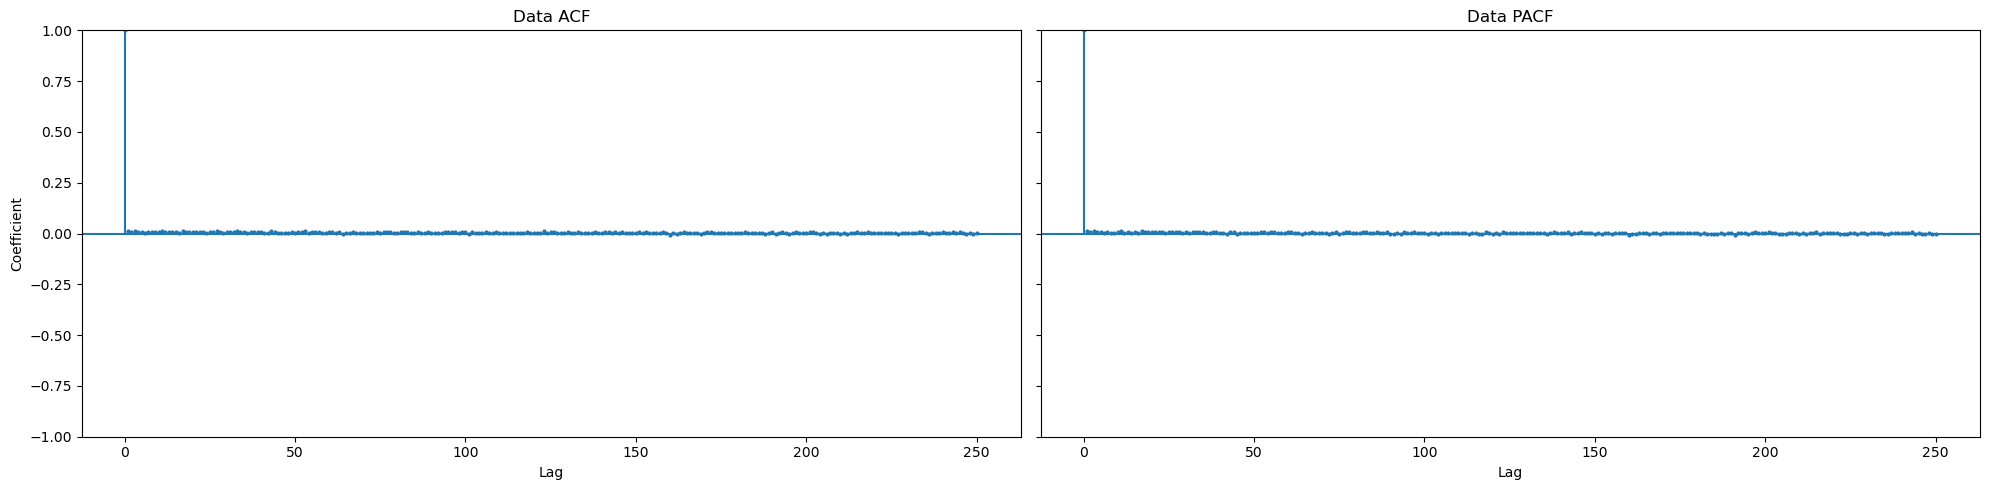

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_autocorrs(Y, name = None, lags = 10):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
    plot_acf(Y, lags = lags, ax=axes[0], markersize = 2)
    axes[0].set_title(f"{name} ACF")
    axes[0].set_xlabel("Lag")
    axes[0].set_ylabel("Coefficient")
    plot_pacf(Y, lags = lags, ax=axes[1], markersize = 2)
    axes[1].set_title(f"{name} PACF")
    axes[1].set_xlabel("Lag")
    plt.tight_layout()
    plt.show()
plot_autocorrs(Y.loc[:, "price_per_module"], name = "Data", lags=250)

As we can see from the visualisation above, our plan to use indeces as basis for sequencing especially for ARIMA or any model with auto-regression is not the case, in our X vectors we keep our dates scaled by shifted last date, so date is coming as exogenous part and not as basis for lags, so we are not dealing with a true time-series already, and from the beggining since there is varying amount of installations per days. But anyway we can use auto-regressive models and arima for general predictions of price and power of modules. What we have to do is to group our price and system size observations within a certain period. We can keep our feature selection above for models without auto-reg.  

Let's reload our dataset, then plot autocorrelations and use an ARIMA and other regressors. I will load only our Y values straight, since basically there is no way to adequately aggregate exogenous part (we can create exogenous part by aggregating rebates or grants, or output_capacity_inverter_1, which is not very informative since output capacity inverter is a part of solar system which is affected by system_size_DC, not vise versa, there is an impact of rebates or grants on total price (people procure bigger systems), but we are checking price per module and power per module), we will include observations starting from 2015.  

**One thing I have changed is that i moved power_per_module to the X, this is the only one feature which can be used as exogenous variable in our auto-regrssion.**

In [16]:
df2 = None
if wiped_dataset == True:
    df2 = pd.read_csv("../Phase 2/wiped_nan.csv", parse_dates=["installation_date"], usecols=["total_installed_price", "system_size_DC", "customer_segment", "installation_date", "module_quantity_1"]).sort_values("installation_date")
    df2["price_per_module"] = df2["total_installed_price"] / df2["module_quantity_1"]
    df2["power_per_module"] = df2["system_size_DC"] / df2["module_quantity_1"]
    df2["customer"] = df2["customer_segment"].apply(lambda x: "Consumer" if x == "RES" else "Business")
    df2.drop(["system_size_DC", "total_installed_price", "customer_segment", "module_quantity_1"], axis = 1, inplace = True)
else:
    df2 = pd.read_csv("../Phase 2/updated_features.csv", usecols=["price_per_module", "power_per_module", "customer", "installation_date"], parse_dates=["installation_date"]).sort_values("installation_date")
#df2.drop(df2[df2["price_per_module"] == 1].index, inplace=True)
df2 = df2[df2["installation_date"].dt.year >= 2015]
consumer_data = df2[df2["customer"] == "Consumer"].copy().drop("customer", axis=1).groupby("installation_date").mean()
business_data = df2[df2["customer"] == "Business"].copy().drop("customer", axis=1).groupby("installation_date").mean()

#that didn't really help
'''
price_5 = consumer_data["price_per_module"].quantile(0.05)
price_95 = consumer_data["price_per_module"].quantile(0.95)
consumer_data["price_per_module"].clip(price_5, price_95, inplace=True)

for col in business_data.columns:
    out_5 = business_data[col].quantile(0.05)
    out_95 = business_data["price_per_module"].quantile(0.95)
    business_data[col].clip(out_5, out_95, inplace=True)
'''

consumer_first_date = consumer_data.index.min()
consumer_last_date = consumer_data.index.max()
full_range = pd.date_range(start=consumer_first_date, end=consumer_last_date, freq='D')
consumer_data = consumer_data.reindex(full_range)
consumer_data.fillna(consumer_data.ewm(span=60, adjust=True).mean(), inplace=True)
print("consumer_data NAN:", consumer_data.isna().sum().sum())
print("Consumer first date: ", consumer_first_date)
print("Consumer last date: ", consumer_last_date)
business_first_date = business_data.index.min()
business_last_date = business_data.index.max()
full_range = pd.date_range(start=business_first_date, end=business_last_date, freq='D')
business_data = business_data.reindex(full_range)
business_data.fillna(business_data.ewm(span=60, adjust=True).mean(), inplace=True)
print("business_data NAN:", business_data.isna().sum().sum())
print("Business first date: ", business_first_date)
print("Business last date: ", business_last_date)

# scaling our prices and powers (usually not needed for ARIMA but here it works better)
consumer_scalers = {}
scale(MinMaxScaler, consumer_data.columns.to_list(), consumer_data, save_in=consumer_scalers)
business_scalers = {}
scale(MinMaxScaler, business_data.columns.to_list(), business_data, save_in=business_scalers)
data = {"consumer": consumer_data, "business": business_data}


consumer_data NAN: 0
Consumer first date:  2015-01-01 00:00:00
Consumer last date:  2019-12-31 00:00:00
business_data NAN: 0
Business first date:  2015-01-01 00:00:00
Business last date:  2019-12-31 00:00:00


Now we have dates with prices starting from 2015-01-01 for consumers and starting from 2015-01-01 for business

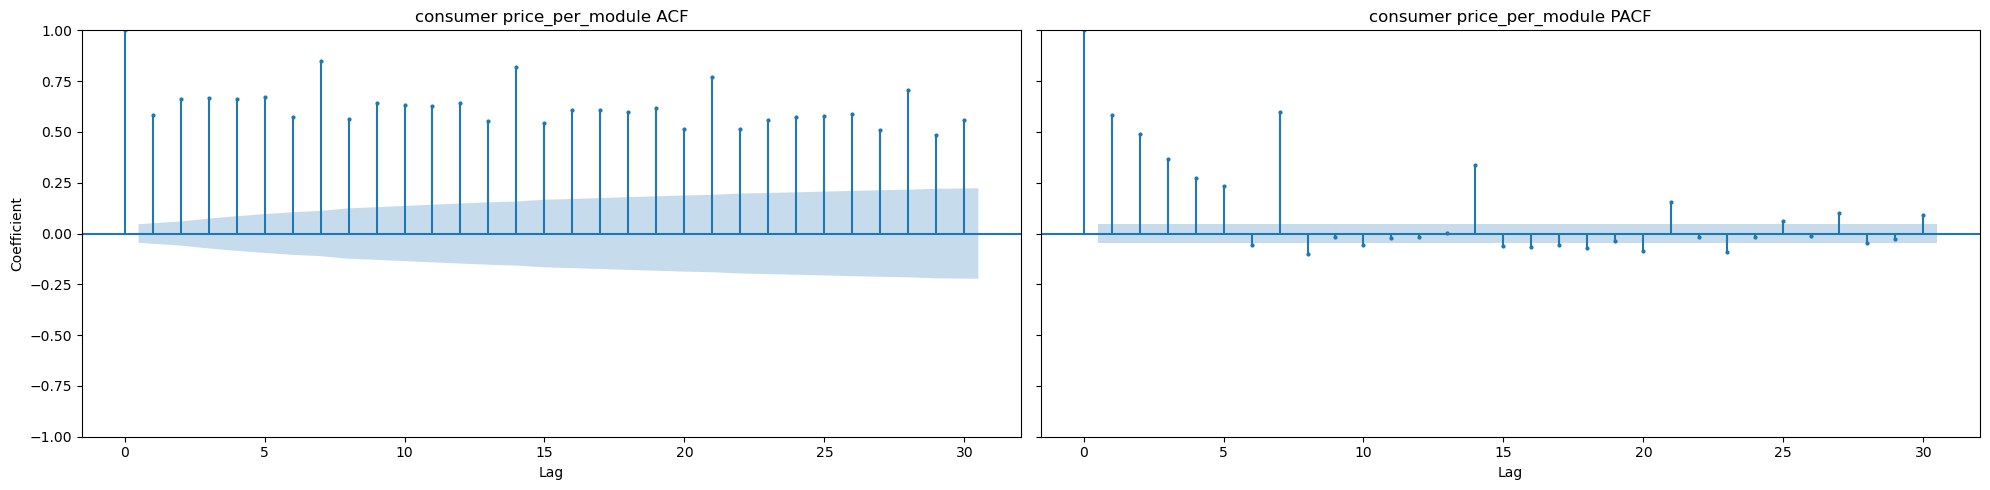

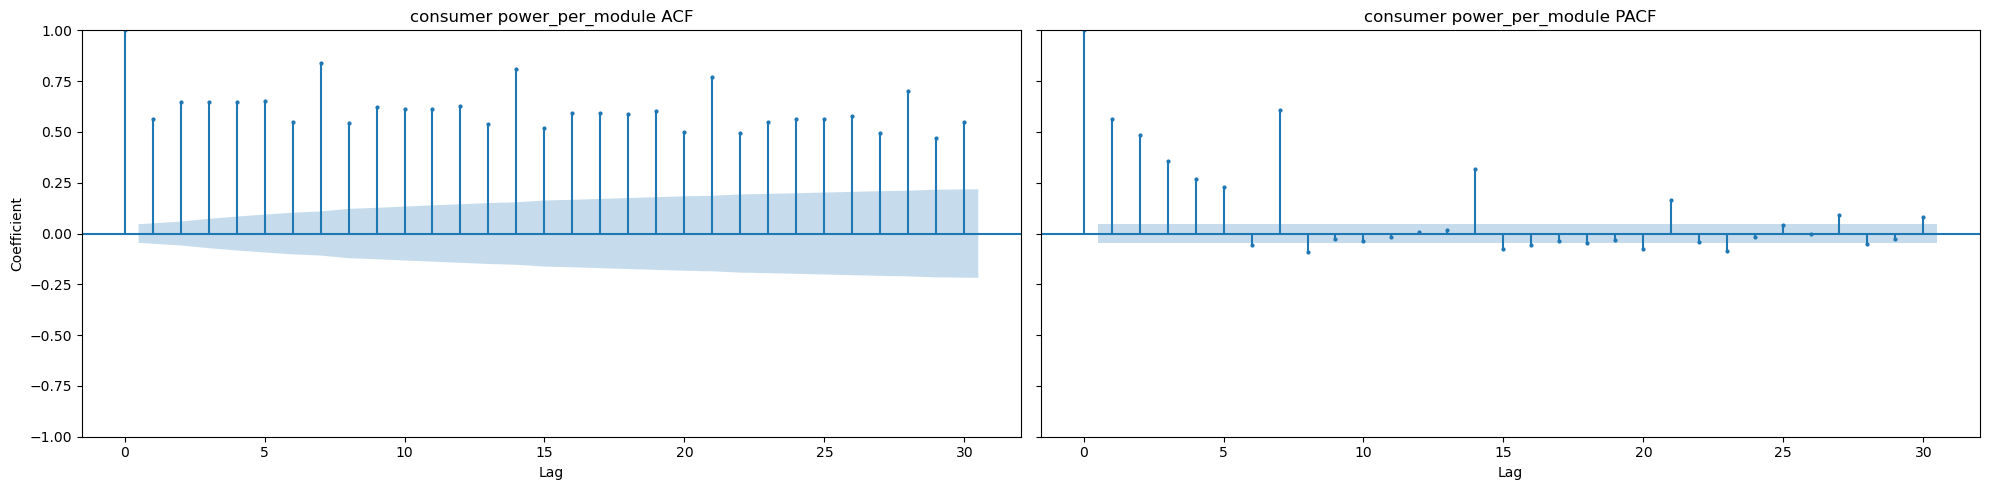

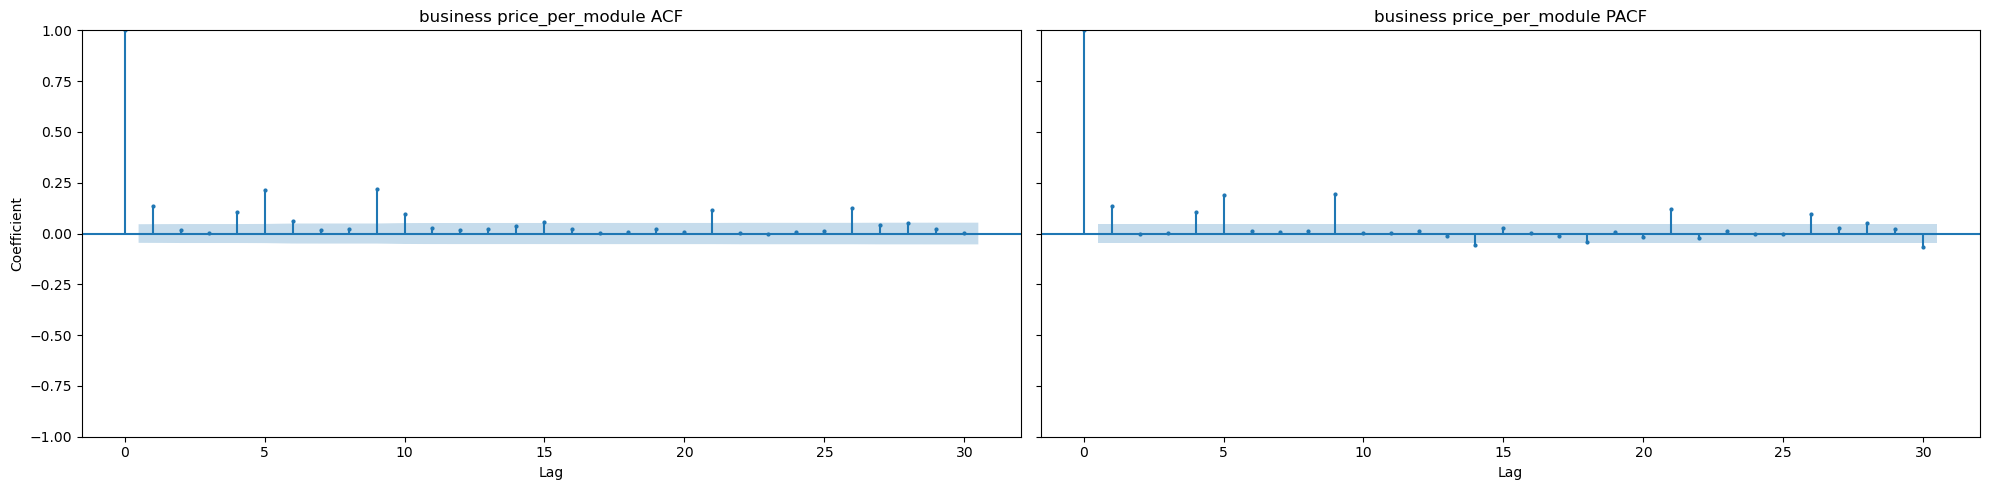

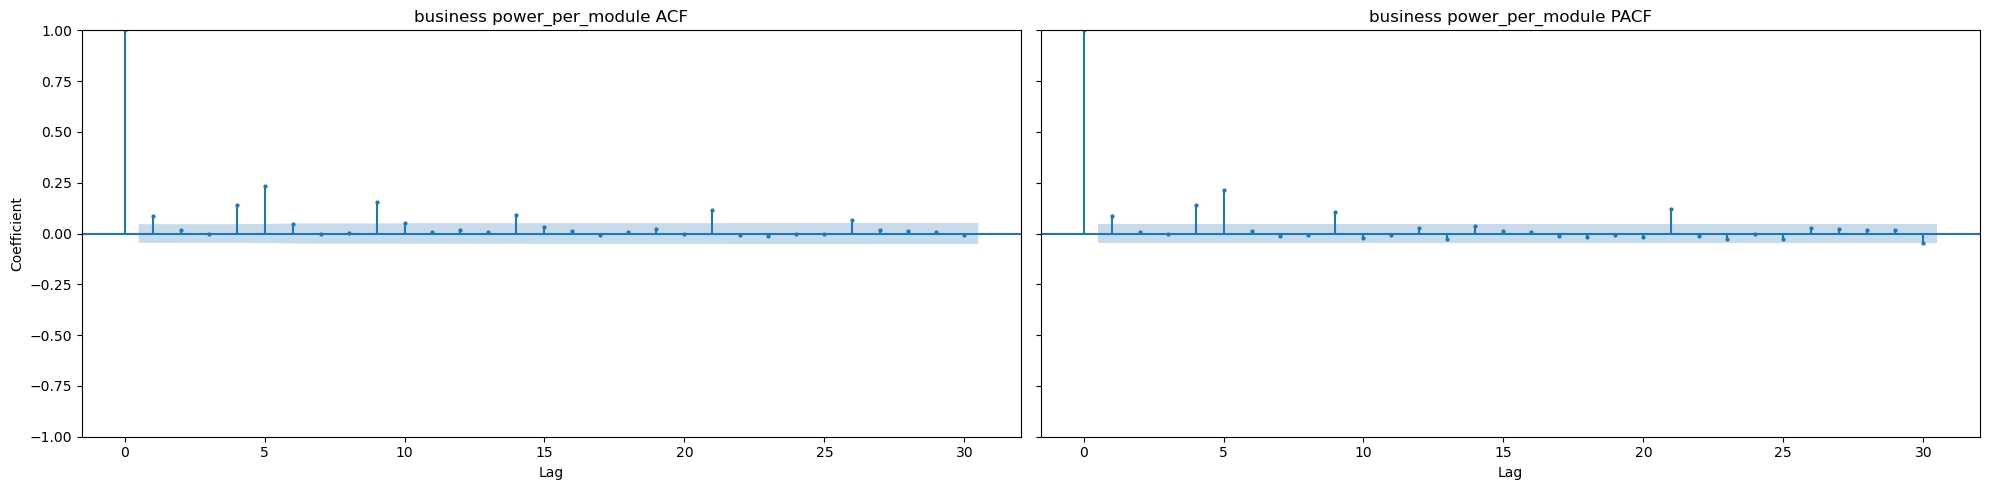

In [17]:
for key, frame in data.items():
    for col in frame.columns:
        plot_autocorrs(frame[col], name = f"{key} {col}", lags = 30)

In [18]:
from sklearn.model_selection import TimeSeriesSplit
def train_test_split_series(data, test_size = 0.2):
    size = len(data)
    train_size = size - int(size * test_size)
    test_start_date = data.index[train_size]
    Y_train = data[:train_size].to_numpy()
    Y_test = data[train_size:].to_numpy()
    return Y_train, Y_test, test_start_date
Y_train_consumer, Y_test_consumer, consumer_test_start = train_test_split_series(consumer_data)
Y_train_business, Y_test_business, business_test_start = train_test_split_series(business_data)
data_train = [Y_train_consumer, Y_train_business]
data_test = [Y_test_consumer, Y_test_business]
print(consumer_test_start, business_test_start)

2019-01-01 00:00:00 2019-01-01 00:00:00


As it is seen from PACF and ACF plots it is reasonable to limit parameter search to p = 7 and q = 7, parameter d (differencing order) autotune can decide itself, but data should be kinda more or less almost statinary in recent years (with small negative trend), seasonal is set to false, while there is noticed some pattern in ACF, nothing is noticed in PACF, data shouldn't have any kind of seasonality (like it was noticed also in phase 2)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-8677.841, Time=1.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7779.184, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8157.076, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8683.017, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7781.184, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8681.086, Time=2.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8681.092, Time=2.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8679.847, Time=2.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8684.826, Time=0.95 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8682.844, Time=1.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-8682.847, Time=1.47 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8159.075, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-8681.566, Time=2.26 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 17.706 seconds
RMSE: 0.

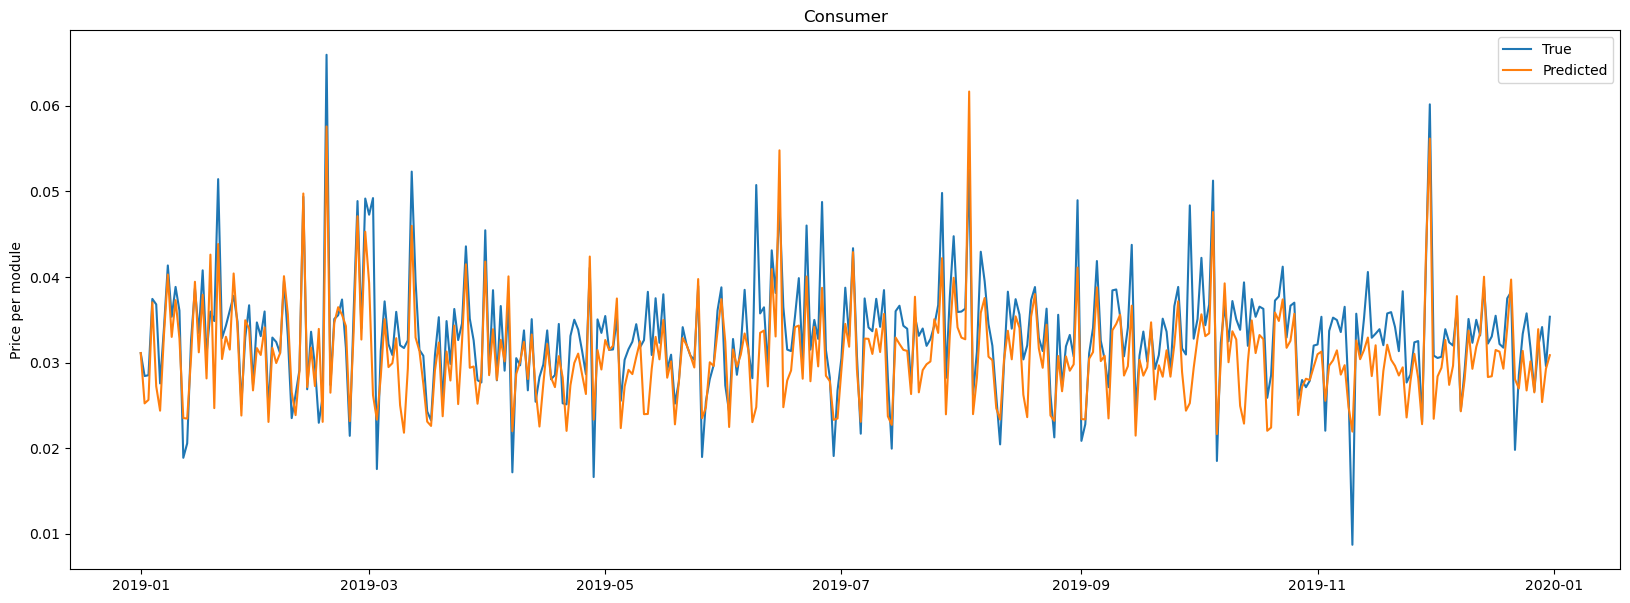

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5968.301, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6323.623, Time=0.81 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5970.301, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6494.736, Time=0.77 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6596.695, Time=2.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-6613.110, Time=1.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-6677.854, Time=1.91 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-6711.958, Time=3.35 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-6742.572, Time=2.66 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-6825.702, Time=4.44 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-6802.581, Time=4.59 sec
 ARIMA(7,1,2)(0,0,0)[0] intercept   : AIC=-6869.519, Time=4.99 sec
 ARIMA(6,1,2)(0,0,0)[0] interce

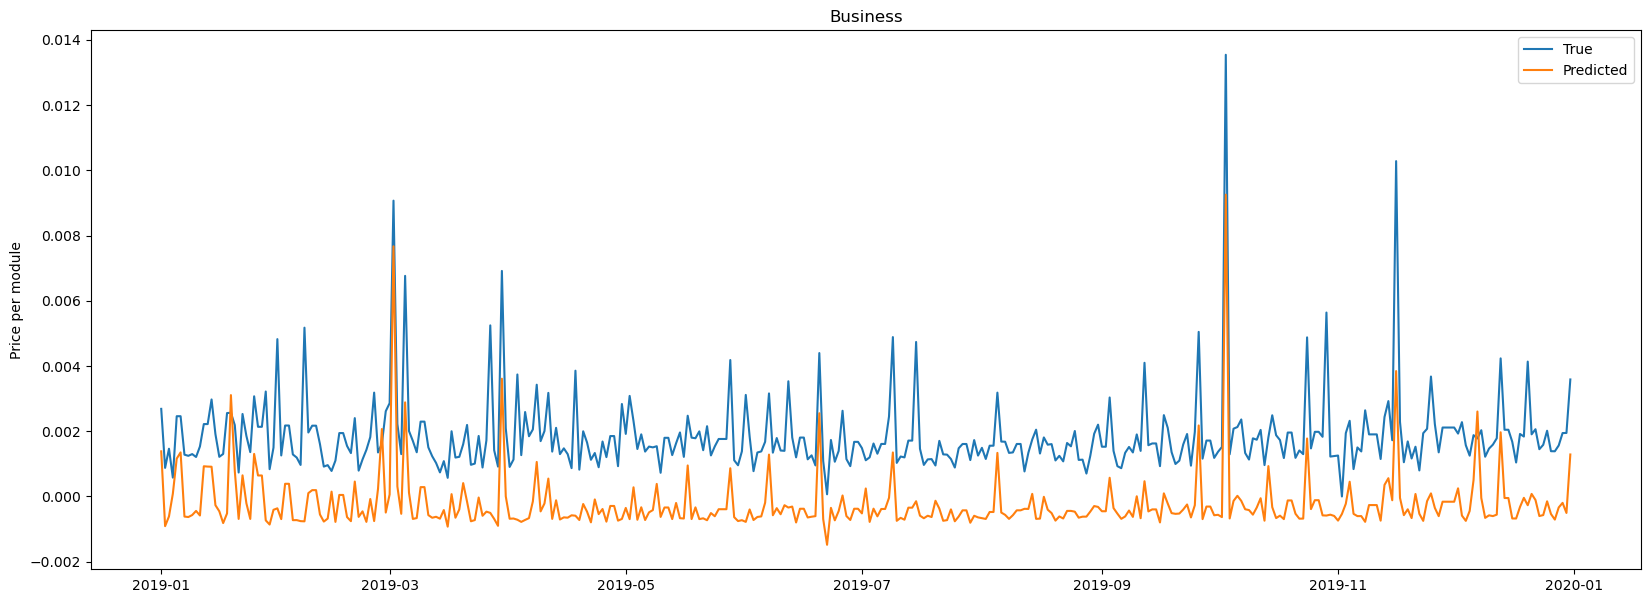

In [19]:
from sklearn.metrics import explained_variance_score, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pmdarima as pm
models = []
for i in range(2):
    model = pm.AutoARIMA(seasonal=False, trace=True, start_q=3, start_p=3, max_p=7, max_q = 7)
    model.fit(data_train[i][:, 0],X=data_train[i][:, 1].reshape(-1,1))
    preds = model.predict(n_periods = len(data_test[i][:, 0]), X=data_test[i][:, 1].reshape(-1,1))
    rmse = root_mean_squared_error(data_test[i][:, 0], preds)
    explained_variance = explained_variance_score(data_test[i][:, 0], preds)
    mae = mean_absolute_error(data_test[i][:, 0], preds)
    mape = mean_absolute_percentage_error(data_test[i][:, 0], preds)
    r2 = r2_score(data_test[i][:, 0], preds)
    print("RMSE:", rmse)
    print("Explained variance:", explained_variance)
    print("MAE:", mae)
    print("MAPE:", mape)
    print("R-squared:", r2)
    date_range = pd.date_range(start=consumer_test_start if i==0 else business_test_start, periods=len(data_test[i][:, 0]), freq="D")
    title = "Consumer" if i == 0 else "Business"
    ylabel = "Price per module"
    plt.figure(figsize=(20, 7))
    plt.plot(date_range, data_test[i][:, 0], label = "True")
    plt.plot(date_range, preds, label = "Predicted")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

We will also try auto reg with decision tree and elastic net combined with grid search

Let's start with ElasticNet and now do the modelling only for consumer customer, business data have a huge variance (i have tried clip 5-95 quantiles but it didn't really help), secondly insufficient amount of observations which singificantly affect model's performance. I don't know why, but skforecast requires pandas dataframes as input for fitting not possible to use numpy arrays.

lags grid: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
  Parameters: {'alpha': 0.001, 'l1_ratio': 1.0}
  Backtesting metric: 0.08036623133161713
RMSE: 0.0038263055991968054
Explained variance: 0.6641166190193835
MAE: 0.0024535081506044075
MAPE: 0.08036623133161713
R-squared: 0.6621552315677024


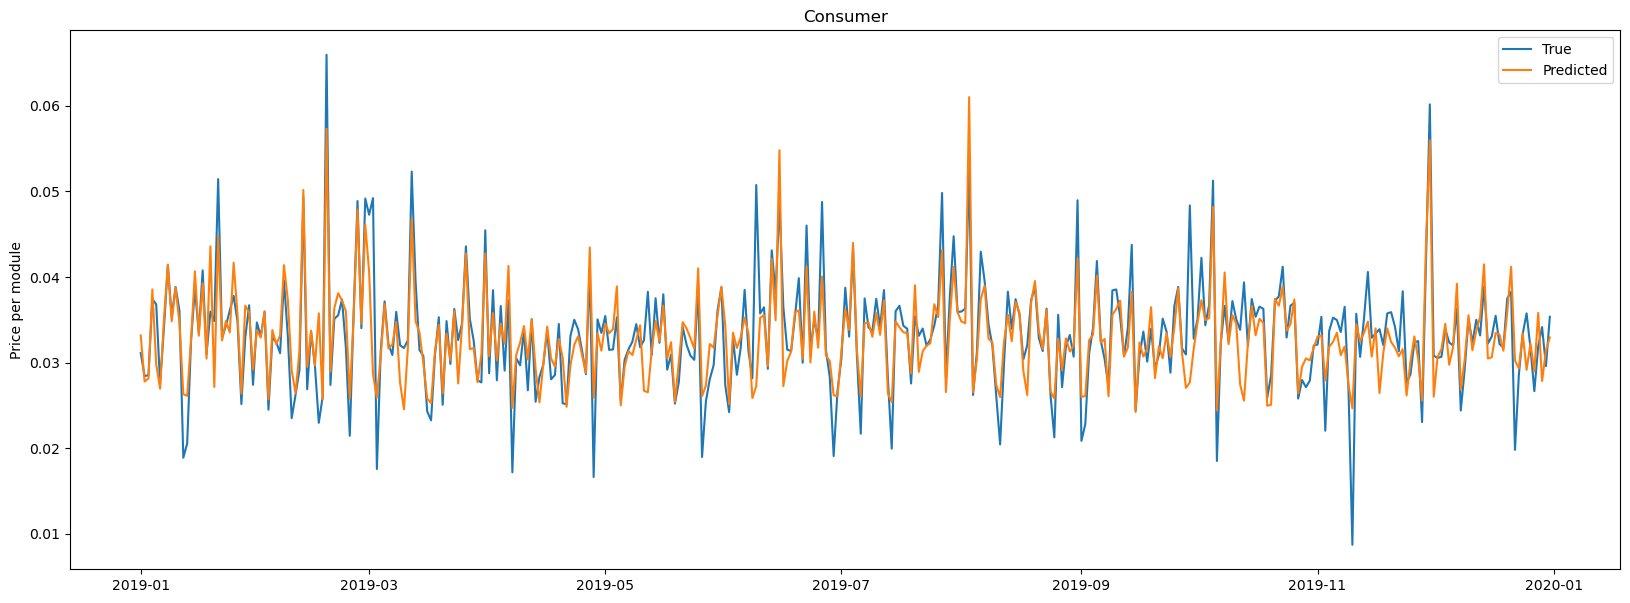

In [20]:
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import TimeSeriesFold
from sklearn.linear_model import ElasticNet
from skforecast.recursive import ForecasterRecursive

forecaster = ForecasterRecursive(regressor=ElasticNet(), lags = 15)
param_grid = {
    'alpha': [0.0005, 0.001, 0.05, 0.5, 1.0, 2.0],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0], 
}
lags_grid = [30, 50, 100, 150, [1,2,3,4,5,7,9,13,15,20,50]]
result_grid = grid_search_forecaster(
    forecaster = forecaster,
    y = consumer_data["price_per_module"],
    cv = TimeSeriesFold(initial_train_size = len(Y_train_consumer), steps=len(Y_test_consumer), refit=False, fixed_train_size=True, verbose=True), #ONLY ONE FOLD train 75% test 25%
    param_grid = param_grid,
    lags_grid = lags_grid,
    metric = 'mean_absolute_percentage_error',
    return_best = True,
    verbose = False,
    exog=consumer_data["power_per_module"]
)
forecaster.fit(consumer_data[:len(Y_train_consumer)]["price_per_module"], consumer_data[:len(Y_train_consumer)]["power_per_module"])
preds = forecaster.predict(steps = len(Y_test_consumer), exog=consumer_data["power_per_module"][len(Y_train_consumer):])
rmse = root_mean_squared_error(Y_test_consumer[:, 0], preds)
explained_variance = explained_variance_score(Y_test_consumer[:, 0], preds)
mae = mean_absolute_error(Y_test_consumer[:, 0], preds)
mape = mean_absolute_percentage_error(Y_test_consumer[:, 0], preds)
r2 = r2_score(Y_test_consumer[:, 0], preds)
print("RMSE:", rmse)
print("Explained variance:", explained_variance)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)
date_range = pd.date_range(start=consumer_test_start, periods=len(Y_test_consumer[:, 0]), freq="D")
title = "Consumer"
ylabel = "Price per module"
plt.figure(figsize=(20, 7))
plt.plot(date_range, Y_test_consumer[:, 0], label = "True")
plt.plot(date_range, preds, label = "Predicted")
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()
i+=1


Decision tree regressor auto reg

lags grid: 100%|██████████| 4/4 [03:59<00:00, 59.96s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] 
  Parameters: {'ccp_alpha': 0, 'criterion': 'poisson', 'max_depth': 5, 'min_samples_split': 2}
  Backtesting metric: 0.09178291273675157
RMSE: 0.004244403533135329
Explained variance: 0.6117269097966036
MAE: 0.002925979768699763
MAPE: 0.09178291273675171
R-squared: 0.5842892775892519


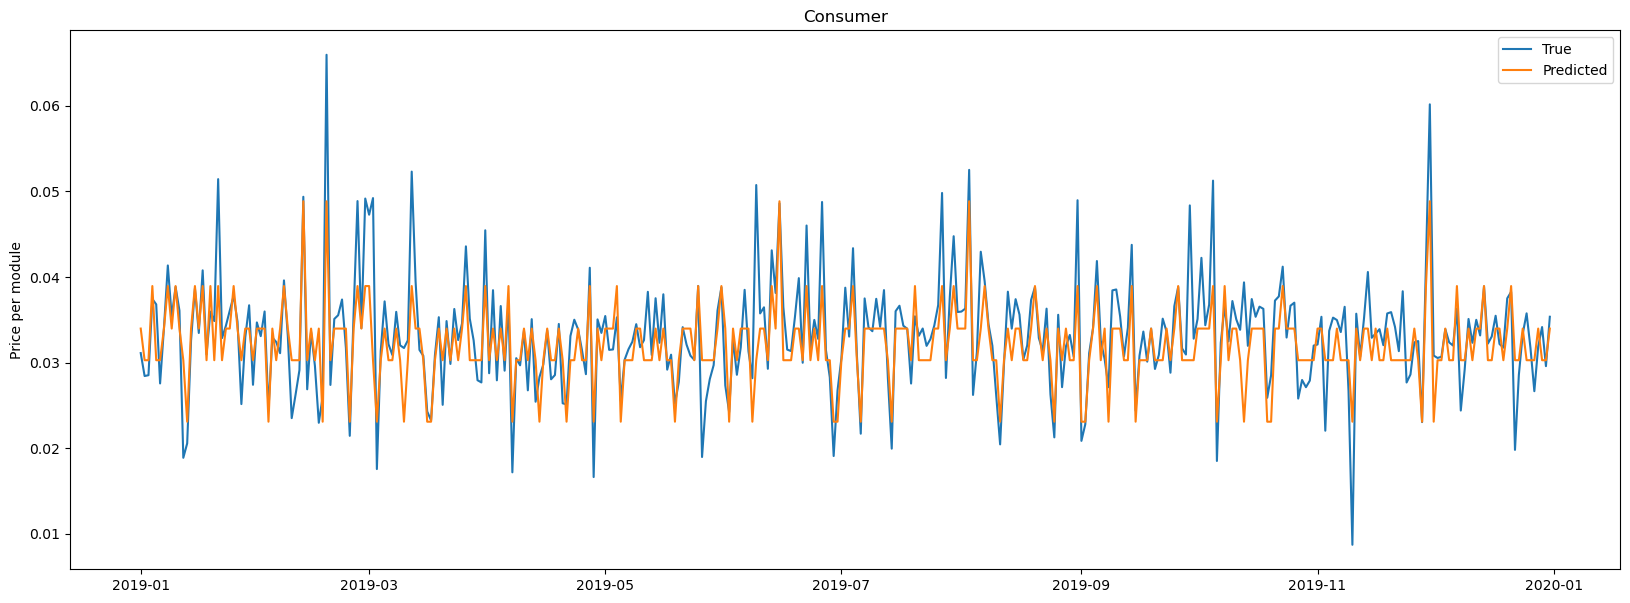

In [21]:
from sklearn.tree import DecisionTreeRegressor

forecaster = ForecasterRecursive(regressor=DecisionTreeRegressor(), lags = 15)
param_grid = {
'max_depth': [3, 5, 10, 15], 
'min_samples_split': [2, 5, 10],   
'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],  
'ccp_alpha': [0, 0.0001, 0.001]
}
lags_grid = [30, 50, 100, [6,7,9,15,20]]
result_grid = grid_search_forecaster(
    forecaster = forecaster,
    y = consumer_data["price_per_module"],
    cv = TimeSeriesFold(initial_train_size = len(Y_train_consumer), steps=len(Y_test_consumer), refit=False, fixed_train_size=True, verbose=True), #ONLY ONE FOLD train 75% test 25%
    param_grid = param_grid,
    lags_grid = lags_grid,
    metric = 'mean_absolute_percentage_error',
    return_best = True,
    verbose = False,
    exog=consumer_data["power_per_module"]
)
forecaster.fit(consumer_data[:len(Y_train_consumer)]["price_per_module"], consumer_data[:len(Y_train_consumer)]["power_per_module"])
preds = forecaster.predict(steps = len(Y_test_consumer), exog=consumer_data["power_per_module"][len(Y_train_consumer):])
rmse = root_mean_squared_error(Y_test_consumer[:, 0], preds)
explained_variance = explained_variance_score(Y_test_consumer[:, 0], preds)
mae = mean_absolute_error(Y_test_consumer[:, 0], preds)
mape = mean_absolute_percentage_error(Y_test_consumer[:, 0], preds)
r2 = r2_score(Y_test_consumer[:, 0], preds)
print("RMSE:", rmse)
print("Explained variance:", explained_variance)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)
date_range = pd.date_range(start=consumer_test_start, periods=len(Y_test_consumer[:, 0]), freq="D")
title = "Consumer"
ylabel = "Price per module"
plt.figure(figsize=(20, 7))
plt.plot(date_range, Y_test_consumer[:, 0], label = "True")
plt.plot(date_range, preds, label = "Predicted")
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()
i+=1

### Back to our main dataset

**After careful consideration it was decided to include power_per_module in X, and remove output_capacity_inverter**

`Ideally, the inverter you choose should match your solar panel capacity. For example, a 5 kW solar panel system will generally require a 5 kW inverter for optimal performance.`

Here it is also important to mention that we are trying to verify how well models are able to predict future, so we split our data on train sample and test sample without shuffling and shuffle only train sample separatly. Then we make a custom PredefinedSplit for GridSearchCV and concatenate our samples into one back to back. (basically i am doing 1 fold CV - which is usual train-validation splitting, for simplicity i used GridSerach instead of loops)

Dumping everything important to pickle. Fun fact that if you change order of columns in dataset XGB produces different results :)

In [ ]:
X.drop("output_capacity_per_module", axis=1, inplace=True)
X["power_per_module"] = Y["power_per_module"].copy()
Y.drop("power_per_module", axis=1, inplace=True)

X_binary = X.columns[(X.nunique() == 2)].to_list()
X_nonbinary = X.columns[X.columns.isin(cat_cols) & ~X.columns.isin(X_binary)].to_list()
X_continous = X.columns[~X.columns.isin(X_binary + X_nonbinary)].to_list()

joblib.dump({"Binary":X_binary, "Categorial": X_nonbinary, "Continous": X_continous}, "column_data20.pkl")
unique_catergories = {}
for col in X_nonbinary:
    unique_catergories[col] = uniques_per_category[col]
joblib.dump(unique_catergories , "unique_categories20.pkl")

binary_encoders = {}
binary_encoders["customer"] = LabelEncoder().fit(["Consumer", "Business"])
for col in X_binary:
    if col != "customer":
        binary_encoders[col] = LabelEncoder().fit(["Yes", "No"])
joblib.dump(binary_encoders, "binary_encoders20.pkl")
categorical_encoders = {}
for col in X_nonbinary:
    categorical_encoders[col] = encoders[col]
joblib.dump(categorical_encoders, "categorical_encoders20.pkl")
categorical_scalers = {}
for col in X_nonbinary:
    categorical_scalers[col] = cat_scalers[col]
joblib.dump(categorical_scalers, "categorical_scalers20.pkl")
continous_scalers = {}
for col in X_continous:
    if col != "days_from_first":
        continous_scalers[col] = scalers[col]
joblib.dump(continous_scalers, "continous_scalers20.pkl")

#y_scalers to include can be adjusted if needed
y_scalers = {}
y_scalers["price_per_module"] = scalers["price_per_module"]
joblib.dump(y_scalers, "y_scalers20.pkl")
print(X.columns)
X = X[X_binary + X_nonbinary + X_continous] #YOU CAN TRY CHANGING THE ORDER HERE AND EXPERIENCE DIFFERENT CROSSVALIDATION RESULTS
print(X.columns)
display("X: ", X.head(5), "Y:", Y.head(5))


Index(['utility_service_territory', 'third_party_owned',
       'built_in_meter_inverter_1', 'inverter_manufacturer_1', 'DC_optimizer',
       'micro_inverter_1', 'technology_module_1', 'self_installed',
       'ground_mounted', 'tracking', 'customer', 'days_from_first',
       'module_manufacturer_1', 'power_per_module'],
      dtype='object')
Index(['third_party_owned', 'built_in_meter_inverter_1', 'DC_optimizer',
       'micro_inverter_1', 'self_installed', 'ground_mounted', 'tracking',
       'customer', 'utility_service_territory', 'inverter_manufacturer_1',
       'technology_module_1', 'module_manufacturer_1', 'days_from_first',
       'power_per_module'],
      dtype='object')


'X: '

,third_party_owned,built_in_meter_inverter_1,DC_optimizer,micro_inverter_1,self_installed,ground_mounted,tracking,customer,utility_service_territory,inverter_manufacturer_1,technology_module_1,module_manufacturer_1,days_from_first,power_per_module
0,0,0,0,1,0,0,0,1,0.0,0.220930,0.2,0.446809,0.0,0.029810
1,0,0,0,1,0,0,0,1,0.0,0.779070,0.2,0.879433,0.0,0.028076
2,0,0,0,1,0,0,0,1,1.0,0.220930,0.2,0.659574,0.0,0.027643
3,1,1,1,0,0,0,0,1,1.0,0.837209,0.2,0.446809,0.0,0.027643
4,0,0,0,1,0,0,0,1,0.0,0.220930,0.2,0.446809,0.0,0.027643


'Y:'

,price_per_module
0,0.048602
1,0.190276
2,0.039246
3,0.011287
4,0.097182


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import PredefinedSplit
X_CV, X_test, Y_CV, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
X_CV, Y_CV = shuffle(X_CV, Y_CV, random_state=555) #Shuffling only past, not future
targets = ['price_per_module']#, 'power_per_module']
test_fold = np.zeros(len(X))
test_fold[len(X_CV):] = -1
splitter = PredefinedSplit(test_fold=test_fold)
X_CV = pd.concat([X_CV, X_test])
Y_CV = pd.concat([Y_CV, Y_test])
models = {}

### ElasticNet {'alpha': 0.0001, 'l1_ratio': 1.0} - Lasso with L1 and alpha = 0.0001 is Just a linear regression

Fitting 1 folds for each of 24 candidates, totalling 24 fits
{'alpha': 0.0001, 'l1_ratio': 1.0}
RMSE: 0.05485868172114496
Explained variance: 0.562918181287497
MAE: 0.031710815524809324
MAPE: 0.9941120847690231
R-squared: 0.5628749571558952


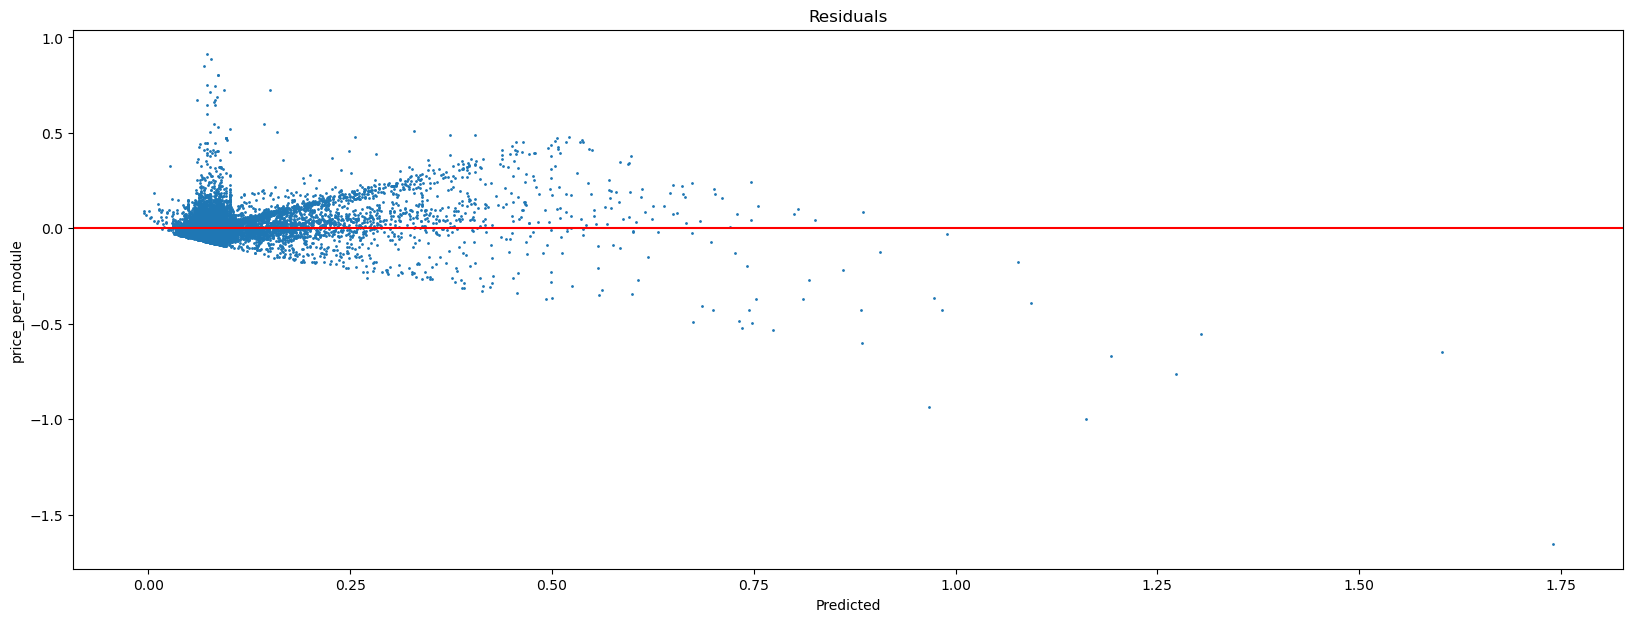

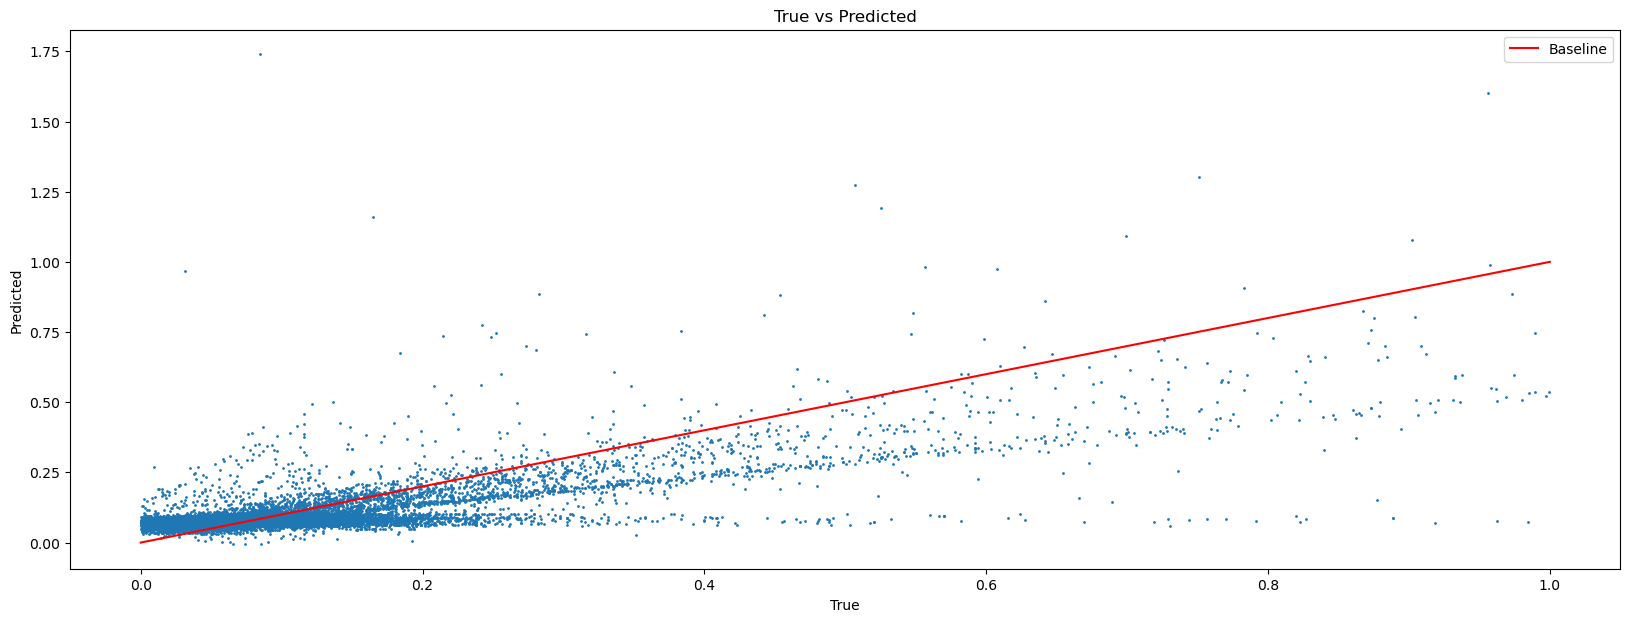

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
models = {}
param_grid = {
        'alpha': [0.0001, 0.001, 0.05, 0.5, 1.0, 2.0],
        'l1_ratio': [0.1, 0.5, 0.7, 1.0], 
    }
def select_and_validate(model, name, param_grid, targets, save_model_in :dict, verbose = 1):
    for target in targets:
        gs = GridSearchCV(estimator=model, scoring="explained_variance", cv = splitter, verbose=verbose, refit= True, param_grid=param_grid) 
        gs.fit(X_CV, Y_CV[target])
        print(gs.best_params_)
        best_model = gs.best_estimator_
        preds = best_model.predict(X_test)
        rmse = root_mean_squared_error(Y_test[target], preds)
        explained_variance = explained_variance_score(Y_test[target], preds)
        mae = mean_absolute_error(Y_test[target], preds)
        mape = mean_absolute_percentage_error(Y_test[target], preds)
        r2 = r2_score(Y_test[target], preds)
        print("RMSE:", rmse)
        print("Explained variance:", explained_variance)
        print("MAE:", mae)
        print("MAPE:", mape)
        print("R-squared:", r2)
        plt.figure(figsize=(20, 7))
        plt.scatter(preds, Y_test[target].to_numpy() - preds, s=1)
        plt.axhline(y = 0, c = "red")
        plt.ylabel(target)
        plt.title("Residuals")
        plt.xlabel("Predicted")
        plt.show()
        plt.figure(figsize=(20, 7))
        plt.scatter(Y_test[target], preds, s=1)
        plt.plot([0,1], [0,1], c = "red", label = "Baseline")
        plt.ylabel("Predicted")
        plt.xlabel("True")
        plt.title("True vs Predicted")
        plt.legend()
        plt.show
        save_model_in[name] = best_model
select_and_validate(ElasticNet(random_state=42), "ElasticNet", param_grid,  targets, models)

### Decision tree {'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 2}

I have tried setting more criterions for params grid but it takes ages to finish the GridSerach when model reaches "absolute_error" evalutation with different depths

Fitting 1 folds for each of 24 candidates, totalling 24 fits
{'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 2}
RMSE: 0.051187119204757325
Explained variance: 0.6197218602682724
MAE: 0.030142653748891298
MAPE: 0.9680779003303597
R-squared: 0.6194284401991714


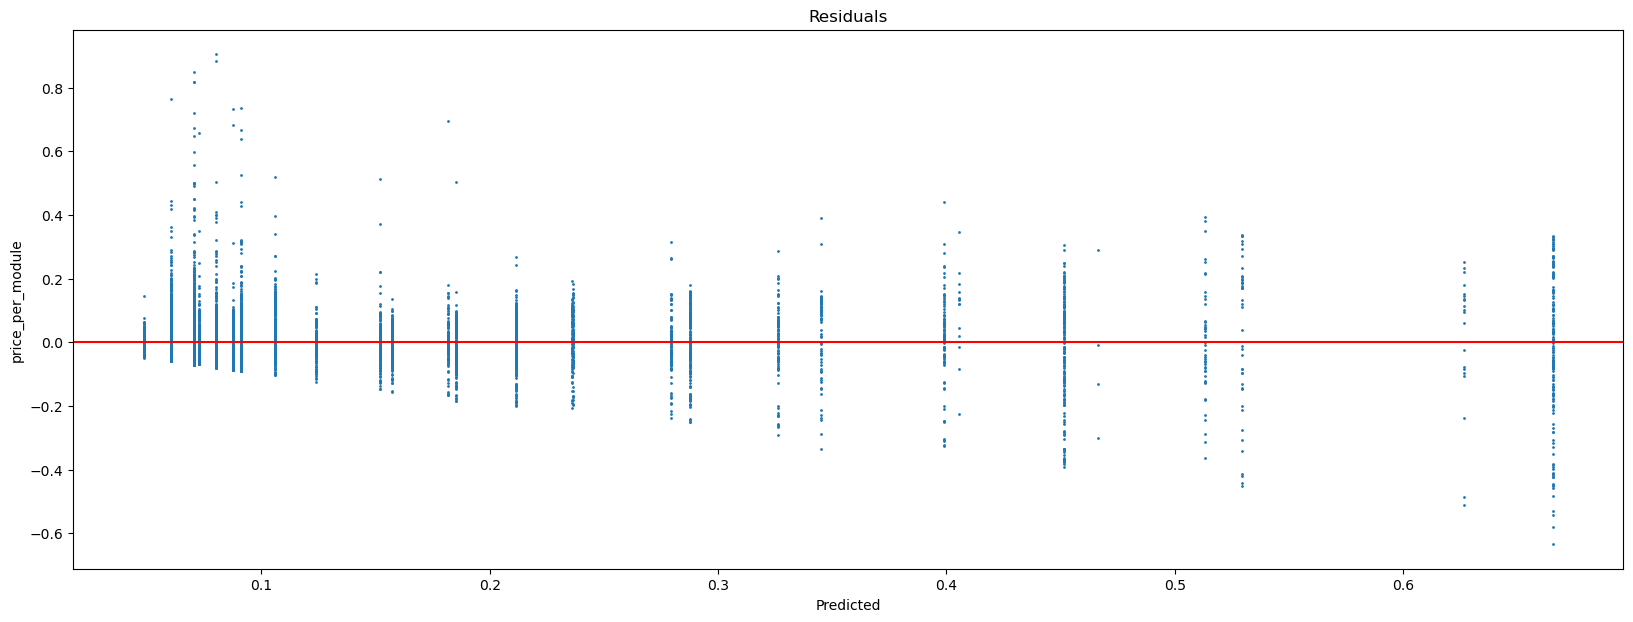

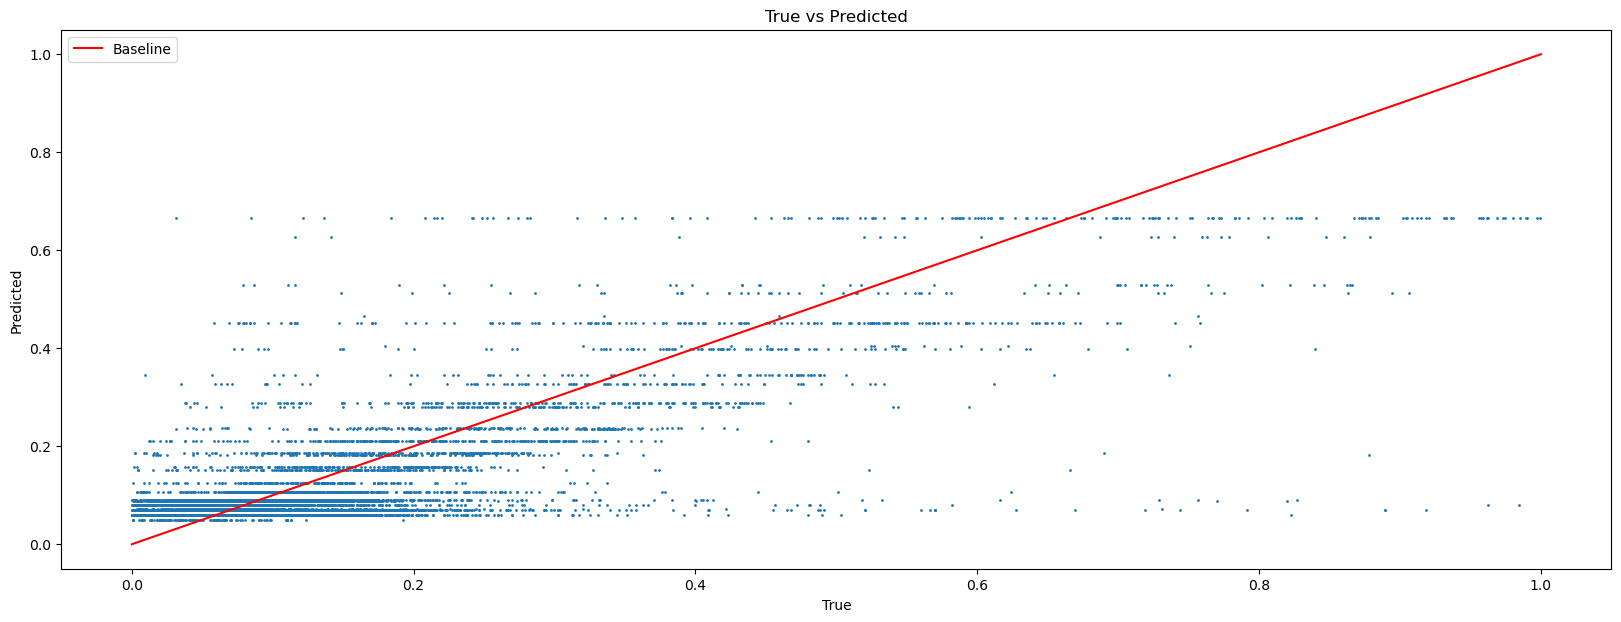

In [25]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_depth': [5, 10, 20, 30], 
    'criterion': ["squared_error"],#"friedman_mse", "absolute_error", "poisson"],  
    'min_samples_split': [2, 5],
    'ccp_alpha': [0, 0.001, 0.1]
  #  'n_estimators': [10, 50, 100, 200]
}
select_and_validate(DecisionTreeRegressor(random_state=42,), "DT", param_grid, targets, models, verbose=1)

### XGBOOST {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}

I was able to get 0.5 MAPE and 0.73 explained variance with objective set to absolute error on GridSerchCV with 3 folds of shuffled data, which is useless, since again we are veryfing model's performance on predicting future, so we shouldn't shuffle whole set to avoid data leakage. Cross validation of XGB produces different result depending on the order of features in the dataset, the result which is mentioned in final evaluation was achieved on default order of features (0.59 MAPE and parameters {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}), the result which is seen now is based on the following order X_binary + X_nonbinary + X_continous. Poor performance of XGB has also affected the performance of next model. The parameters of XGB mentioned in the headline are parameters for the DEFAULT order of features, i have added a comment to the line where order is altered.

Fitting 1 folds for each of 72 candidates, totalling 72 fits
{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
RMSE: 0.04626236163173204
Explained variance: 0.6917979651271672
MAE: 0.022148437973692616
MAPE: 0.6413833465033167
R-squared: 0.6891359133493926


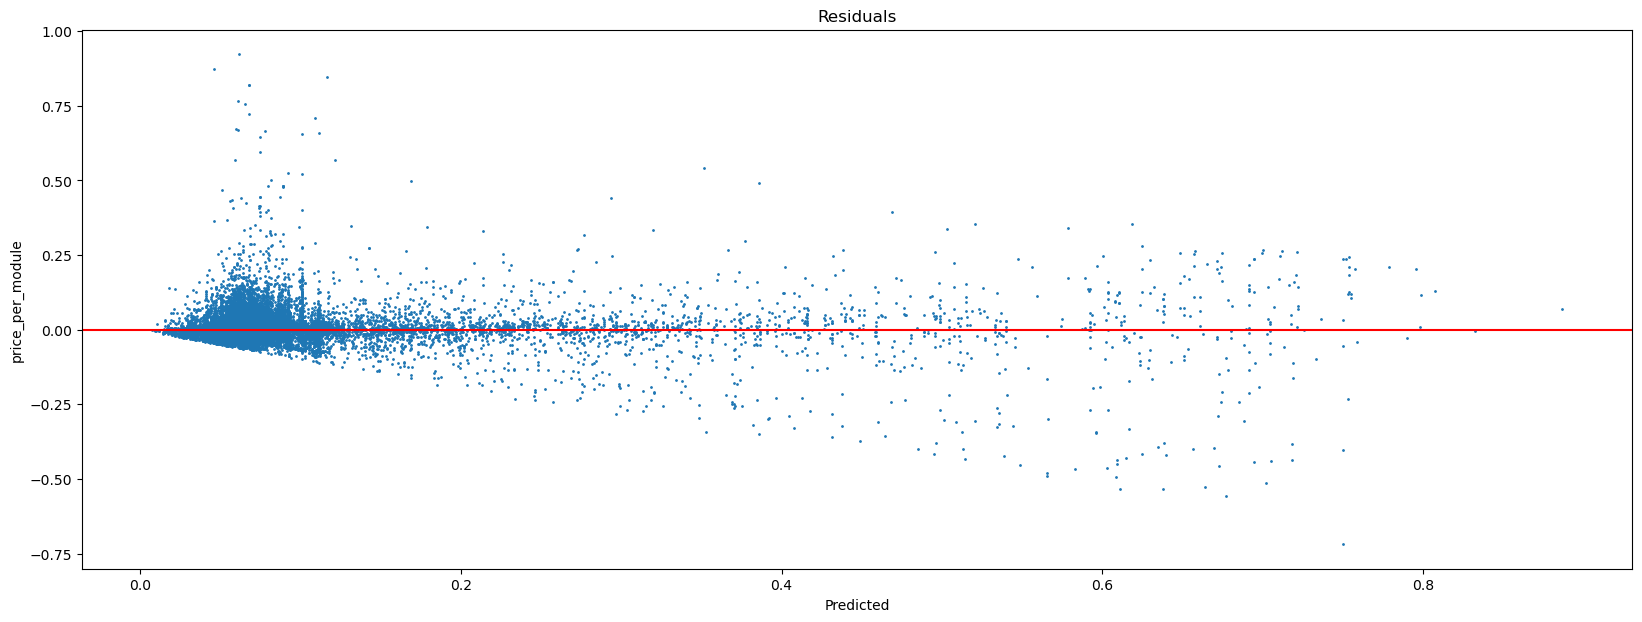

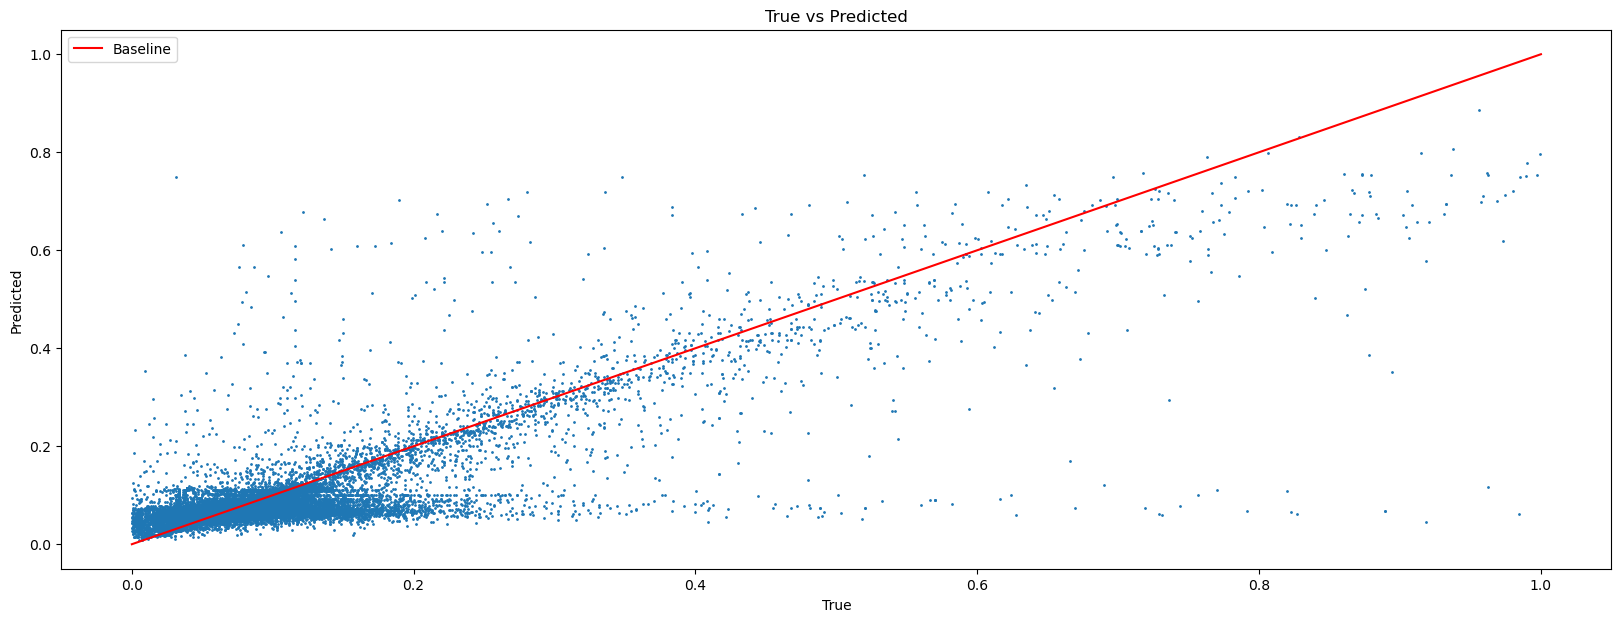

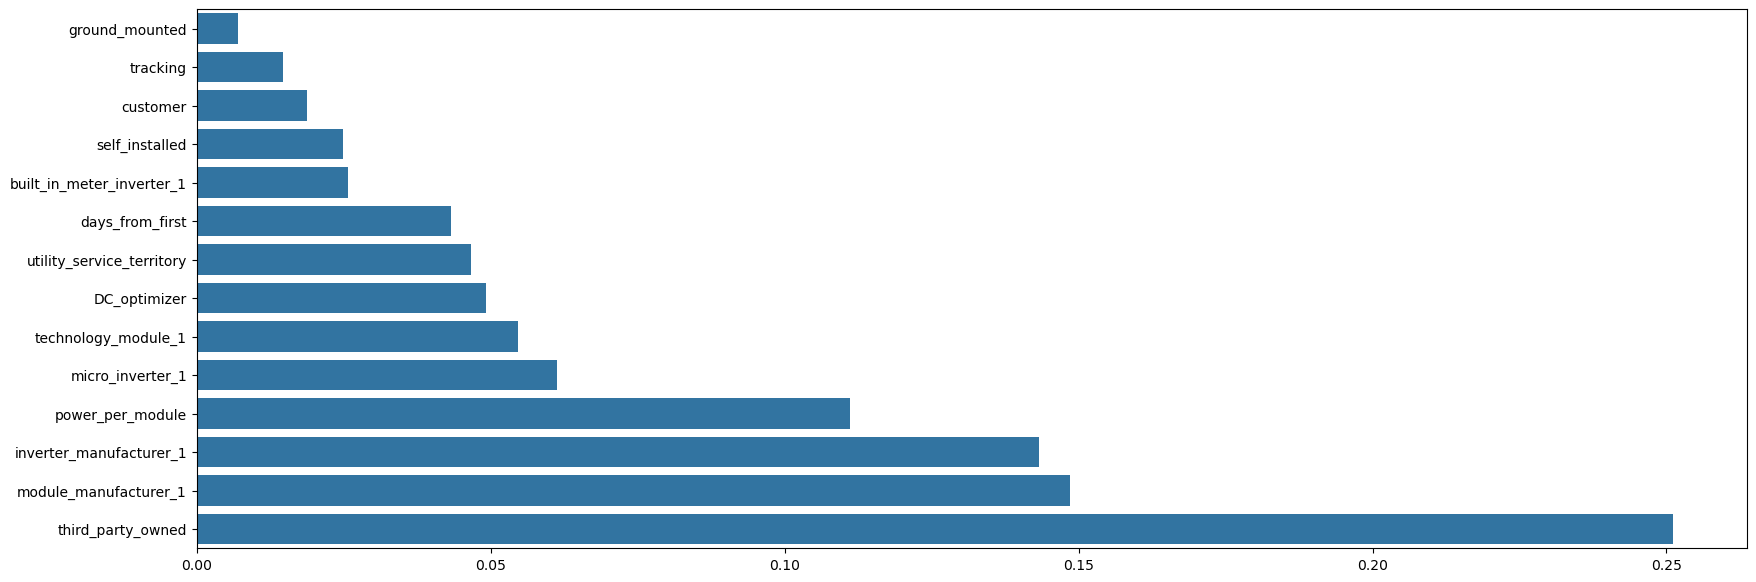

In [26]:
from xgboost import XGBRegressor
param_grid = {
        "learning_rate": [0.001, 0.05, 0.1],
        "max_depth": [6, 8, 12],
        "gamma":[0.0, 0.2],
        "n_estimators": [20, 50, 100, 150],
     #  "alpha": [0, 0.01, 0.1],
     #  "lambda": [1, 1.5, 3.0]
    }


select_and_validate(XGBRegressor(device = "gpu", objective='reg:absoluteerror', random_state=42, verbosity = 0), "XGB", param_grid, targets, models) #objective='reg:sequarederror'
plt.figure(figsize = (20,7))
sorted_ind = np.argsort(models["XGB"].feature_importances_)
sns.barplot(y = np.array(X.columns)[sorted_ind], x=models["XGB"].feature_importances_[sorted_ind], orient="h")
plt.show()

### Combining models above {'dt__ccp_alpha': 0, 'dt__max_depth': 5, 'dt__min_samples_split': 5}

A bit worse than XGB in terms of MAPE, very hard to gridsearch if considering XGB retraining. The parameters mentioned in the headline are parameters for the DEFAULT order of features.

Fitting 1 folds for each of 8 candidates, totalling 8 fits
{'dt__ccp_alpha': 0, 'dt__max_depth': 5, 'dt__min_samples_split': 2}
RMSE: 0.04605031866163476
Explained variance: 0.692067104371177
MAE: 0.02334088091431449
MAPE: 0.7387711335044741
R-squared: 0.6919790661013154


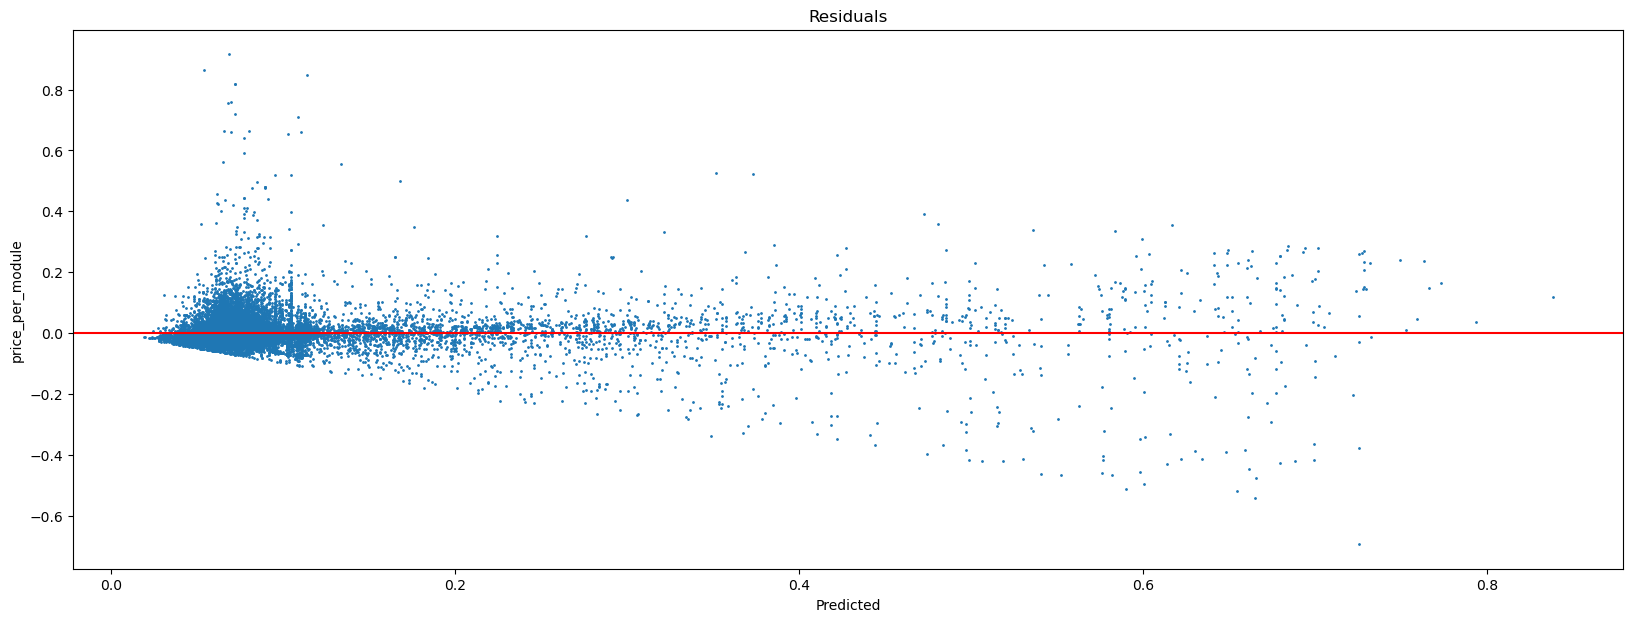

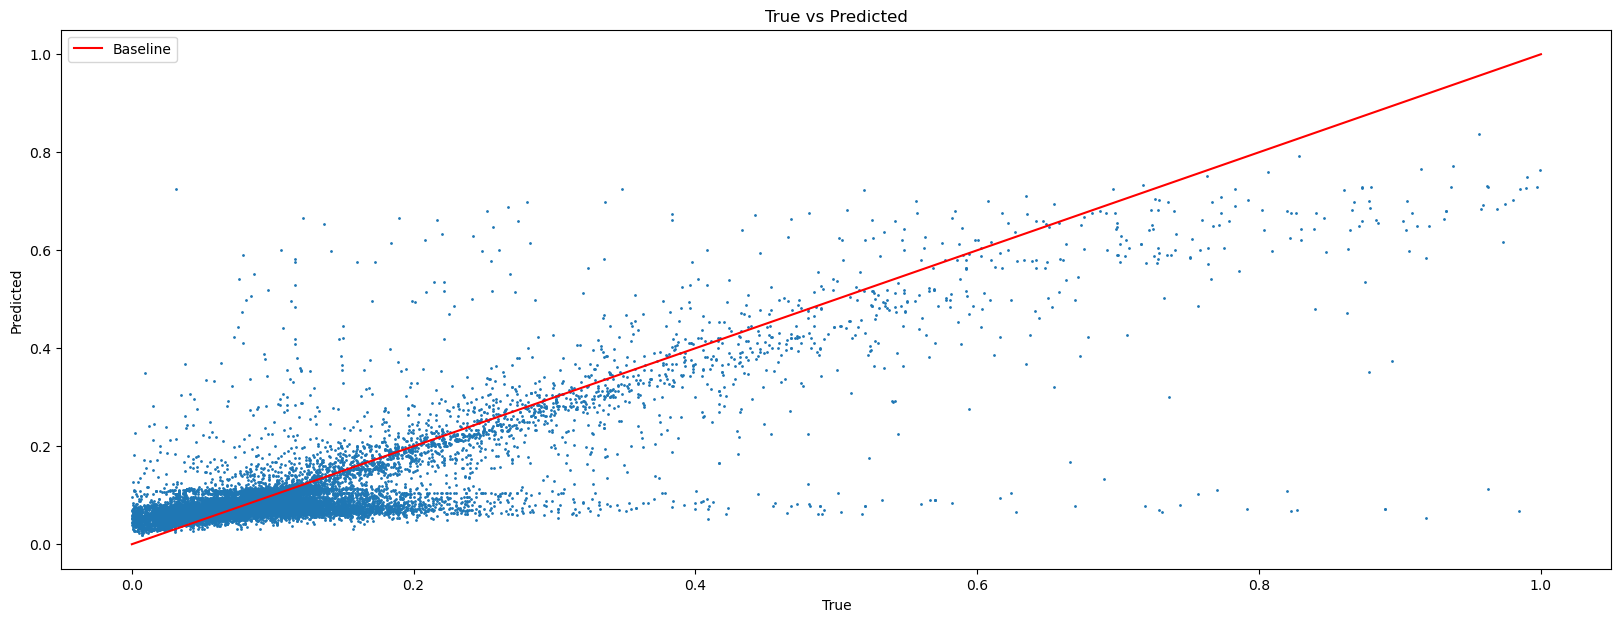

In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
estimators = [('xgb', models["XGB"]), ('dt', DecisionTreeRegressor(random_state=55))]
param_grid = {
    'dt__max_depth': [5, 10],
    'dt__min_samples_split': [2, 5],
    'dt__ccp_alpha': [0, 0.001]
}
model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
select_and_validate(model, "model_stack", param_grid, targets, models, verbose=1)

### Deep learning models

Deep learning models have big problems with convergence on this dataset, i have tried different loss functions and MSE seems to be a bit better. May be more layers and units needed.

In [28]:
display(X.head(5))
X_binary = X.loc[:, (X.nunique() == 2)]
X_nonbinary = X.loc[:, X.columns.isin(cat_cols) & ~X.columns.isin(X_binary.columns)]
X_continous = X.loc[:, ~X.columns.isin(X_binary.columns.to_list() + X_nonbinary.columns.to_list())]

binary_input_dim = len(X_binary.columns)
non_binary_input_dim = len(X_nonbinary.columns)
continous_input_dim = len(X_continous.columns)
vocab_sizes = X_nonbinary.nunique().to_list()
print("Vocabulary sizes:\n", vocab_sizes)
print("Binary dims:", binary_input_dim)
print("Non Binary dims:",non_binary_input_dim)
print("Continous dims:",continous_input_dim)

dense_model_X_train, dense_model_X_test, dense_model_Y_train, dense_model_Y_test = train_test_split(X, Y, test_size = 0.1, shuffle=False)
dense_model_X_train, dense_model_Y_train = shuffle(dense_model_X_train, dense_model_Y_train, random_state=1515)

dense_X_binary_test, dense_X_nonbinary_test, dense_X_continous_test = dense_model_X_test[X_binary.columns].to_numpy(), dense_model_X_test[X_nonbinary.columns].to_numpy(), dense_model_X_test[X_continous.columns].to_numpy()
dense_X_binary_train, dense_X_nonbinary_train, dense_X_continous_train = dense_model_X_train[X_binary.columns].to_numpy(), dense_model_X_train[X_nonbinary.columns].to_numpy(), dense_model_X_train[X_continous.columns].to_numpy()
dense_model_Y_train, dense_model_Y_test = dense_model_Y_train.to_numpy(), dense_model_Y_test.to_numpy()

,third_party_owned,built_in_meter_inverter_1,DC_optimizer,micro_inverter_1,self_installed,ground_mounted,tracking,customer,utility_service_territory,inverter_manufacturer_1,technology_module_1,module_manufacturer_1,days_from_first,power_per_module
0,0,0,0,1,0,0,0,1,0.0,0.220930,0.2,0.446809,0.0,0.029810
1,0,0,0,1,0,0,0,1,0.0,0.779070,0.2,0.879433,0.0,0.028076
2,0,0,0,1,0,0,0,1,1.0,0.220930,0.2,0.659574,0.0,0.027643
3,1,1,1,0,0,0,0,1,1.0,0.837209,0.2,0.446809,0.0,0.027643
4,0,0,0,1,0,0,0,1,0.0,0.220930,0.2,0.446809,0.0,0.027643


Vocabulary sizes:
 [3, 87, 6, 142]
Binary dims: 8
Non Binary dims: 4
Continous dims: 2


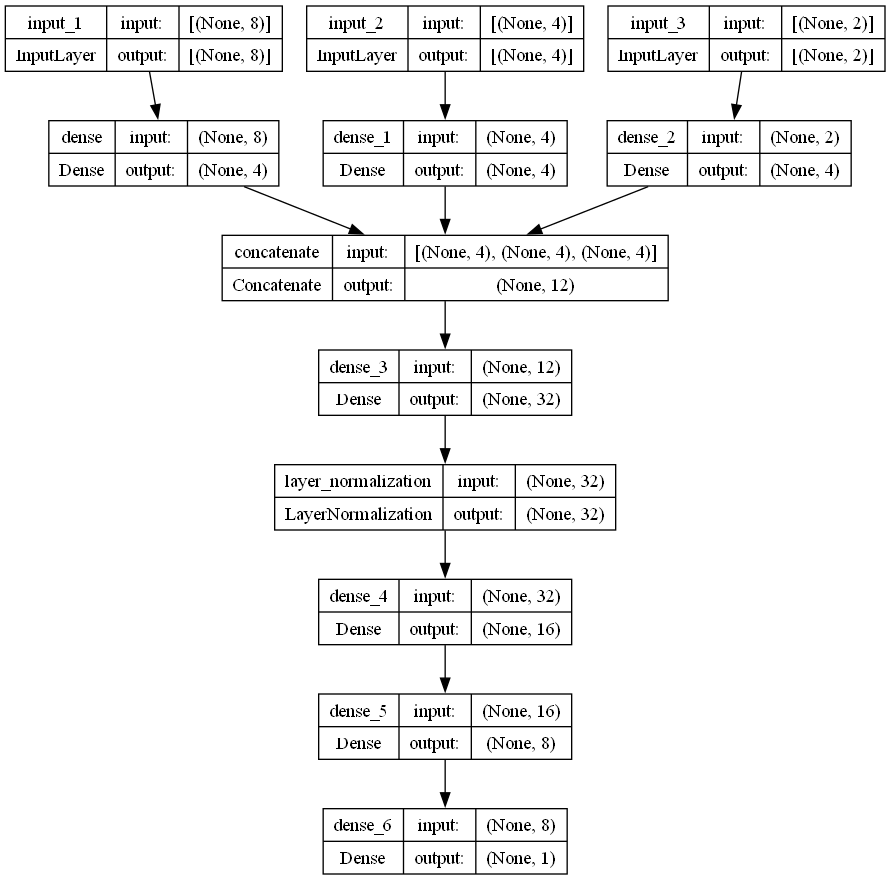

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            36          ['input_1[0][0]']                
                                                                                              

None

Epoch 1/10
4851/4851 [==============================] - 42s 8ms/step - loss: 0.0072 - val_loss: 0.0030
Epoch 2/10
4851/4851 [==============================] - 40s 8ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 3/10
4851/4851 [==============================] - 40s 8ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 4/10
4851/4851 [==============================] - 39s 8ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/10
4851/4851 [==============================] - 39s 8ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/10
4851/4851 [==============================] - 40s 8ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 7/10
4851/4851 [==============================] - 38s 8ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/10
4851/4851 [==============================] - 35s 7ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 9/10
4851/4851 [==============================] - 36s 7ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 10/10
4851/4851 [==============================] - 40s 8ms/step - l

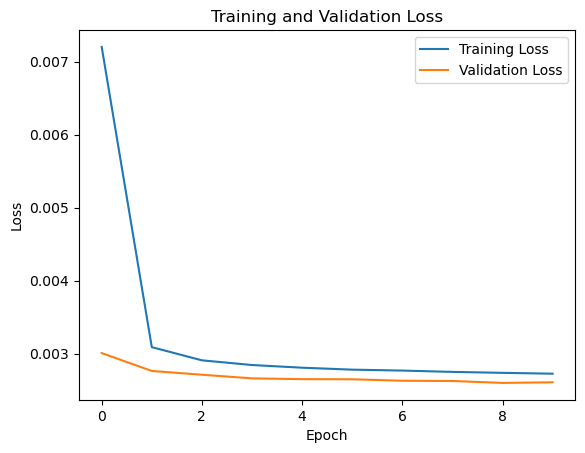

539/539 [==============================] - 2s 3ms/step
RMSE: 0.051080603926327336
Explained variance: 0.6038371009334969
MAE: 0.02991248243102585
MAPE: 1.305247507493115
R-squared: 0.6021524935950768


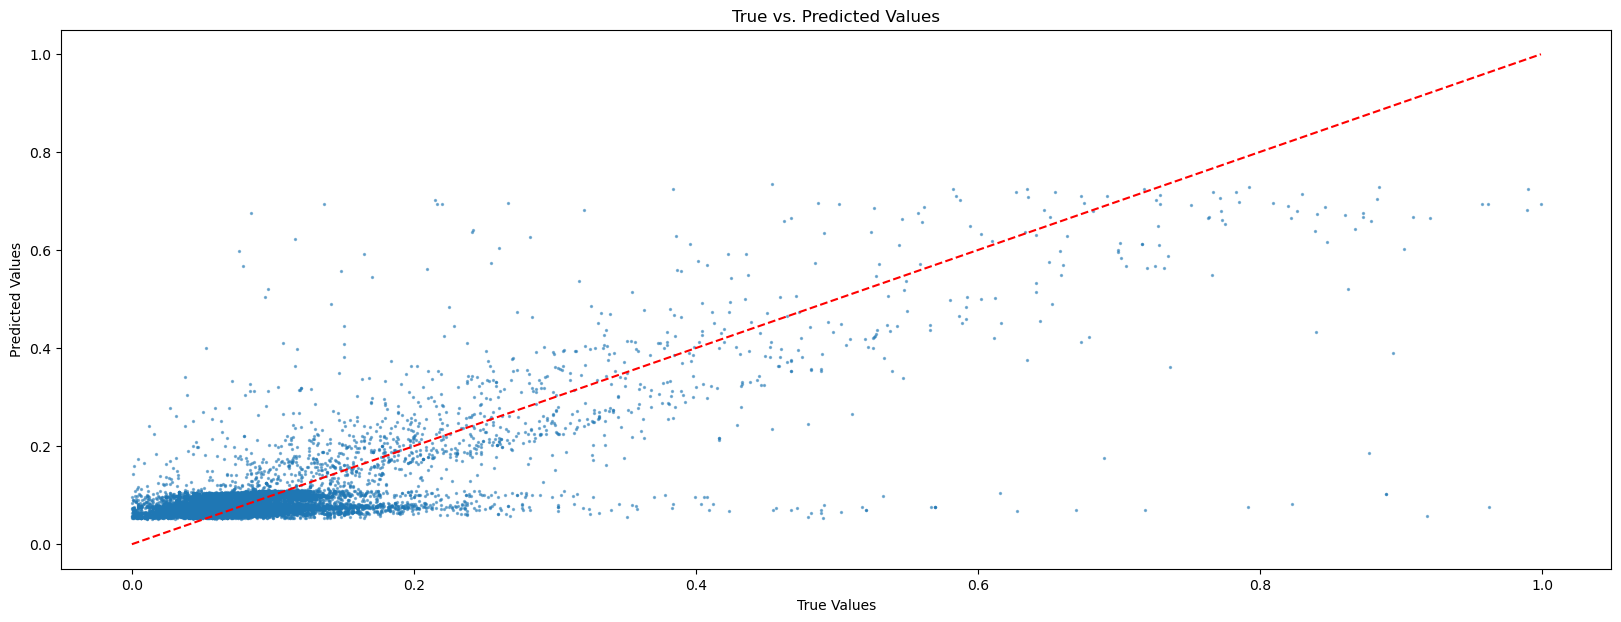

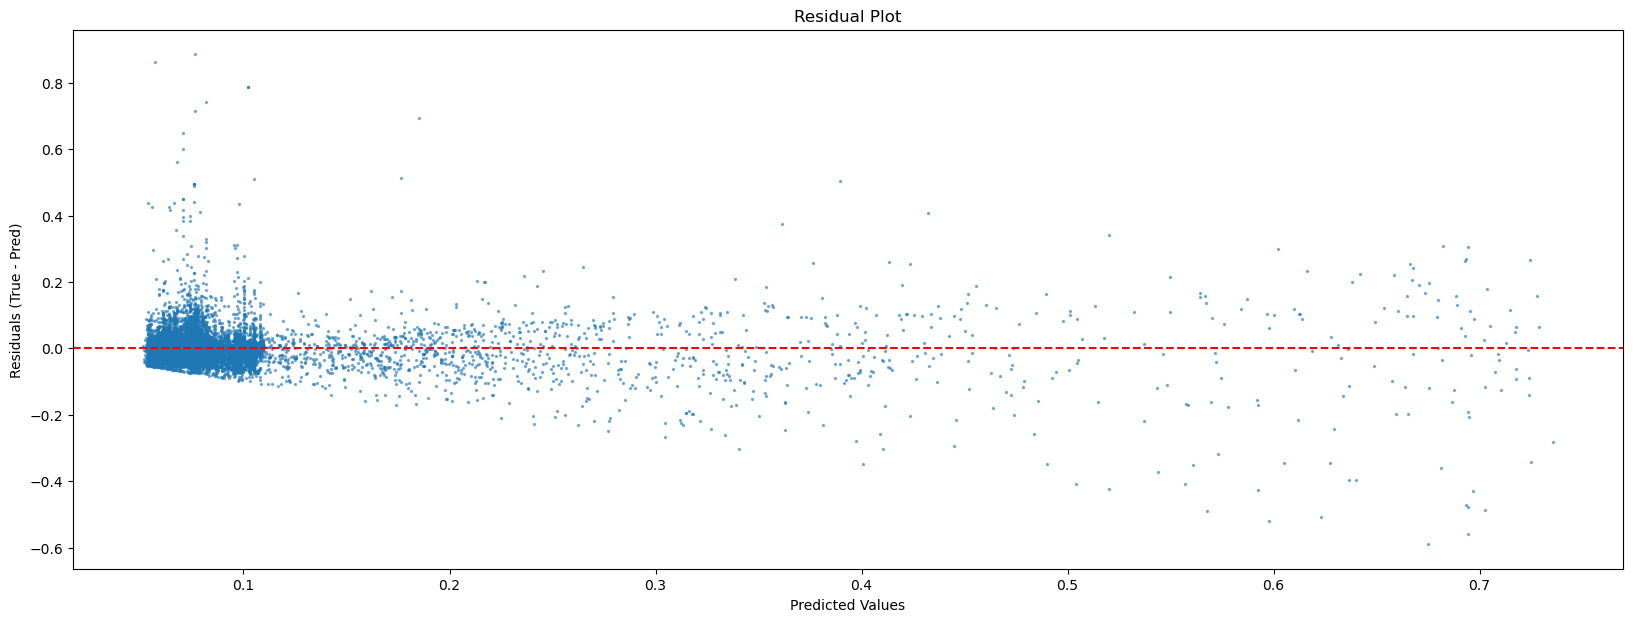

In [29]:
import tensorflow as tf
BATCH_SIZE = 32
tensor_train_dataset = tf.data.Dataset.from_tensor_slices(((dense_X_binary_train, dense_X_nonbinary_train, dense_X_continous_train), dense_model_Y_train)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
tensor_test_dataset = tf.data.Dataset.from_tensor_slices(((dense_X_binary_test, dense_X_nonbinary_test, dense_X_continous_test), dense_model_Y_test)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

def build_dense_model():
    binary_input= tf.keras.layers.Input(shape=(binary_input_dim,))
    non_binary_input =  tf.keras.layers.Input(shape=(non_binary_input_dim))
    continous_input= tf.keras.layers.Input(shape=(continous_input_dim,))

    binary_input_dense = tf.keras.layers.Dense(4, activation="relu")(binary_input)
    non_binary_dense = tf.keras.layers.Dense(4, activation="sigmoid")(non_binary_input)
    continous_dense = tf.keras.layers.Dense(4, activation="sigmoid")(continous_input)

    concat_layer = tf.keras.layers.Concatenate(axis=-1)([binary_input_dense, non_binary_dense, continous_dense])
    dense_layer1 = tf.keras.layers.Dense(32, activation="sigmoid")(concat_layer)
    dense_layer1_normed = tf.keras.layers.LayerNormalization()(dense_layer1)
    dense_layer2 = tf.keras.layers.Dense(16, activation="relu")(dense_layer1_normed)
    dense_layer3 = tf.keras.layers.Dense(8, activation="sigmoid")(dense_layer2)
    output =  tf.keras.layers.Dense(1, activation="sigmoid")(dense_layer3)

    return tf.keras.Model(inputs = [binary_input, non_binary_input, continous_input], outputs = output)

dense_model = build_dense_model()
display(tf.keras.utils.plot_model(model=dense_model, show_shapes=True))
display(dense_model.summary())
dense_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.mean_squared_error)
history = dense_model.fit(tensor_train_dataset, validation_data=tensor_test_dataset, epochs=10)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

test_inputs = (dense_X_binary_test, dense_X_nonbinary_test, dense_X_continous_test)
y_pred = dense_model.predict(test_inputs).flatten()
y_true = dense_model_Y_test.ravel()

rmse = root_mean_squared_error(y_true, y_pred)
explained_variance = explained_variance_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("RMSE:", rmse)
print("Explained variance:", explained_variance)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)

plt.figure(figsize=(20, 7))
plt.scatter(y_true, y_pred, alpha=0.5,  s = 2)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(20, 7))
plt.scatter(y_pred, residuals, alpha=0.5, s = 2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (True - Pred)")
plt.title("Residual Plot")
plt.show()

### Testing the model which can accept additionally a sequence of 500 past installations, their prices and powers, as basis for price prediction of solar panel of interest (queried panel)

I will just try to train on the whole prototyping data, if I will see that model is achieving better results during epochs than previous model I will add split to train/test and validation loop. (converging very very slowly, and processing huge amount of data (1 Split is around 1.5 GB), i have tried different structures, current one seems to be the best, but i might be mistaken). Custom loop is written for memory efficiency. (Maybe should have tried diffrent sequence lenght)

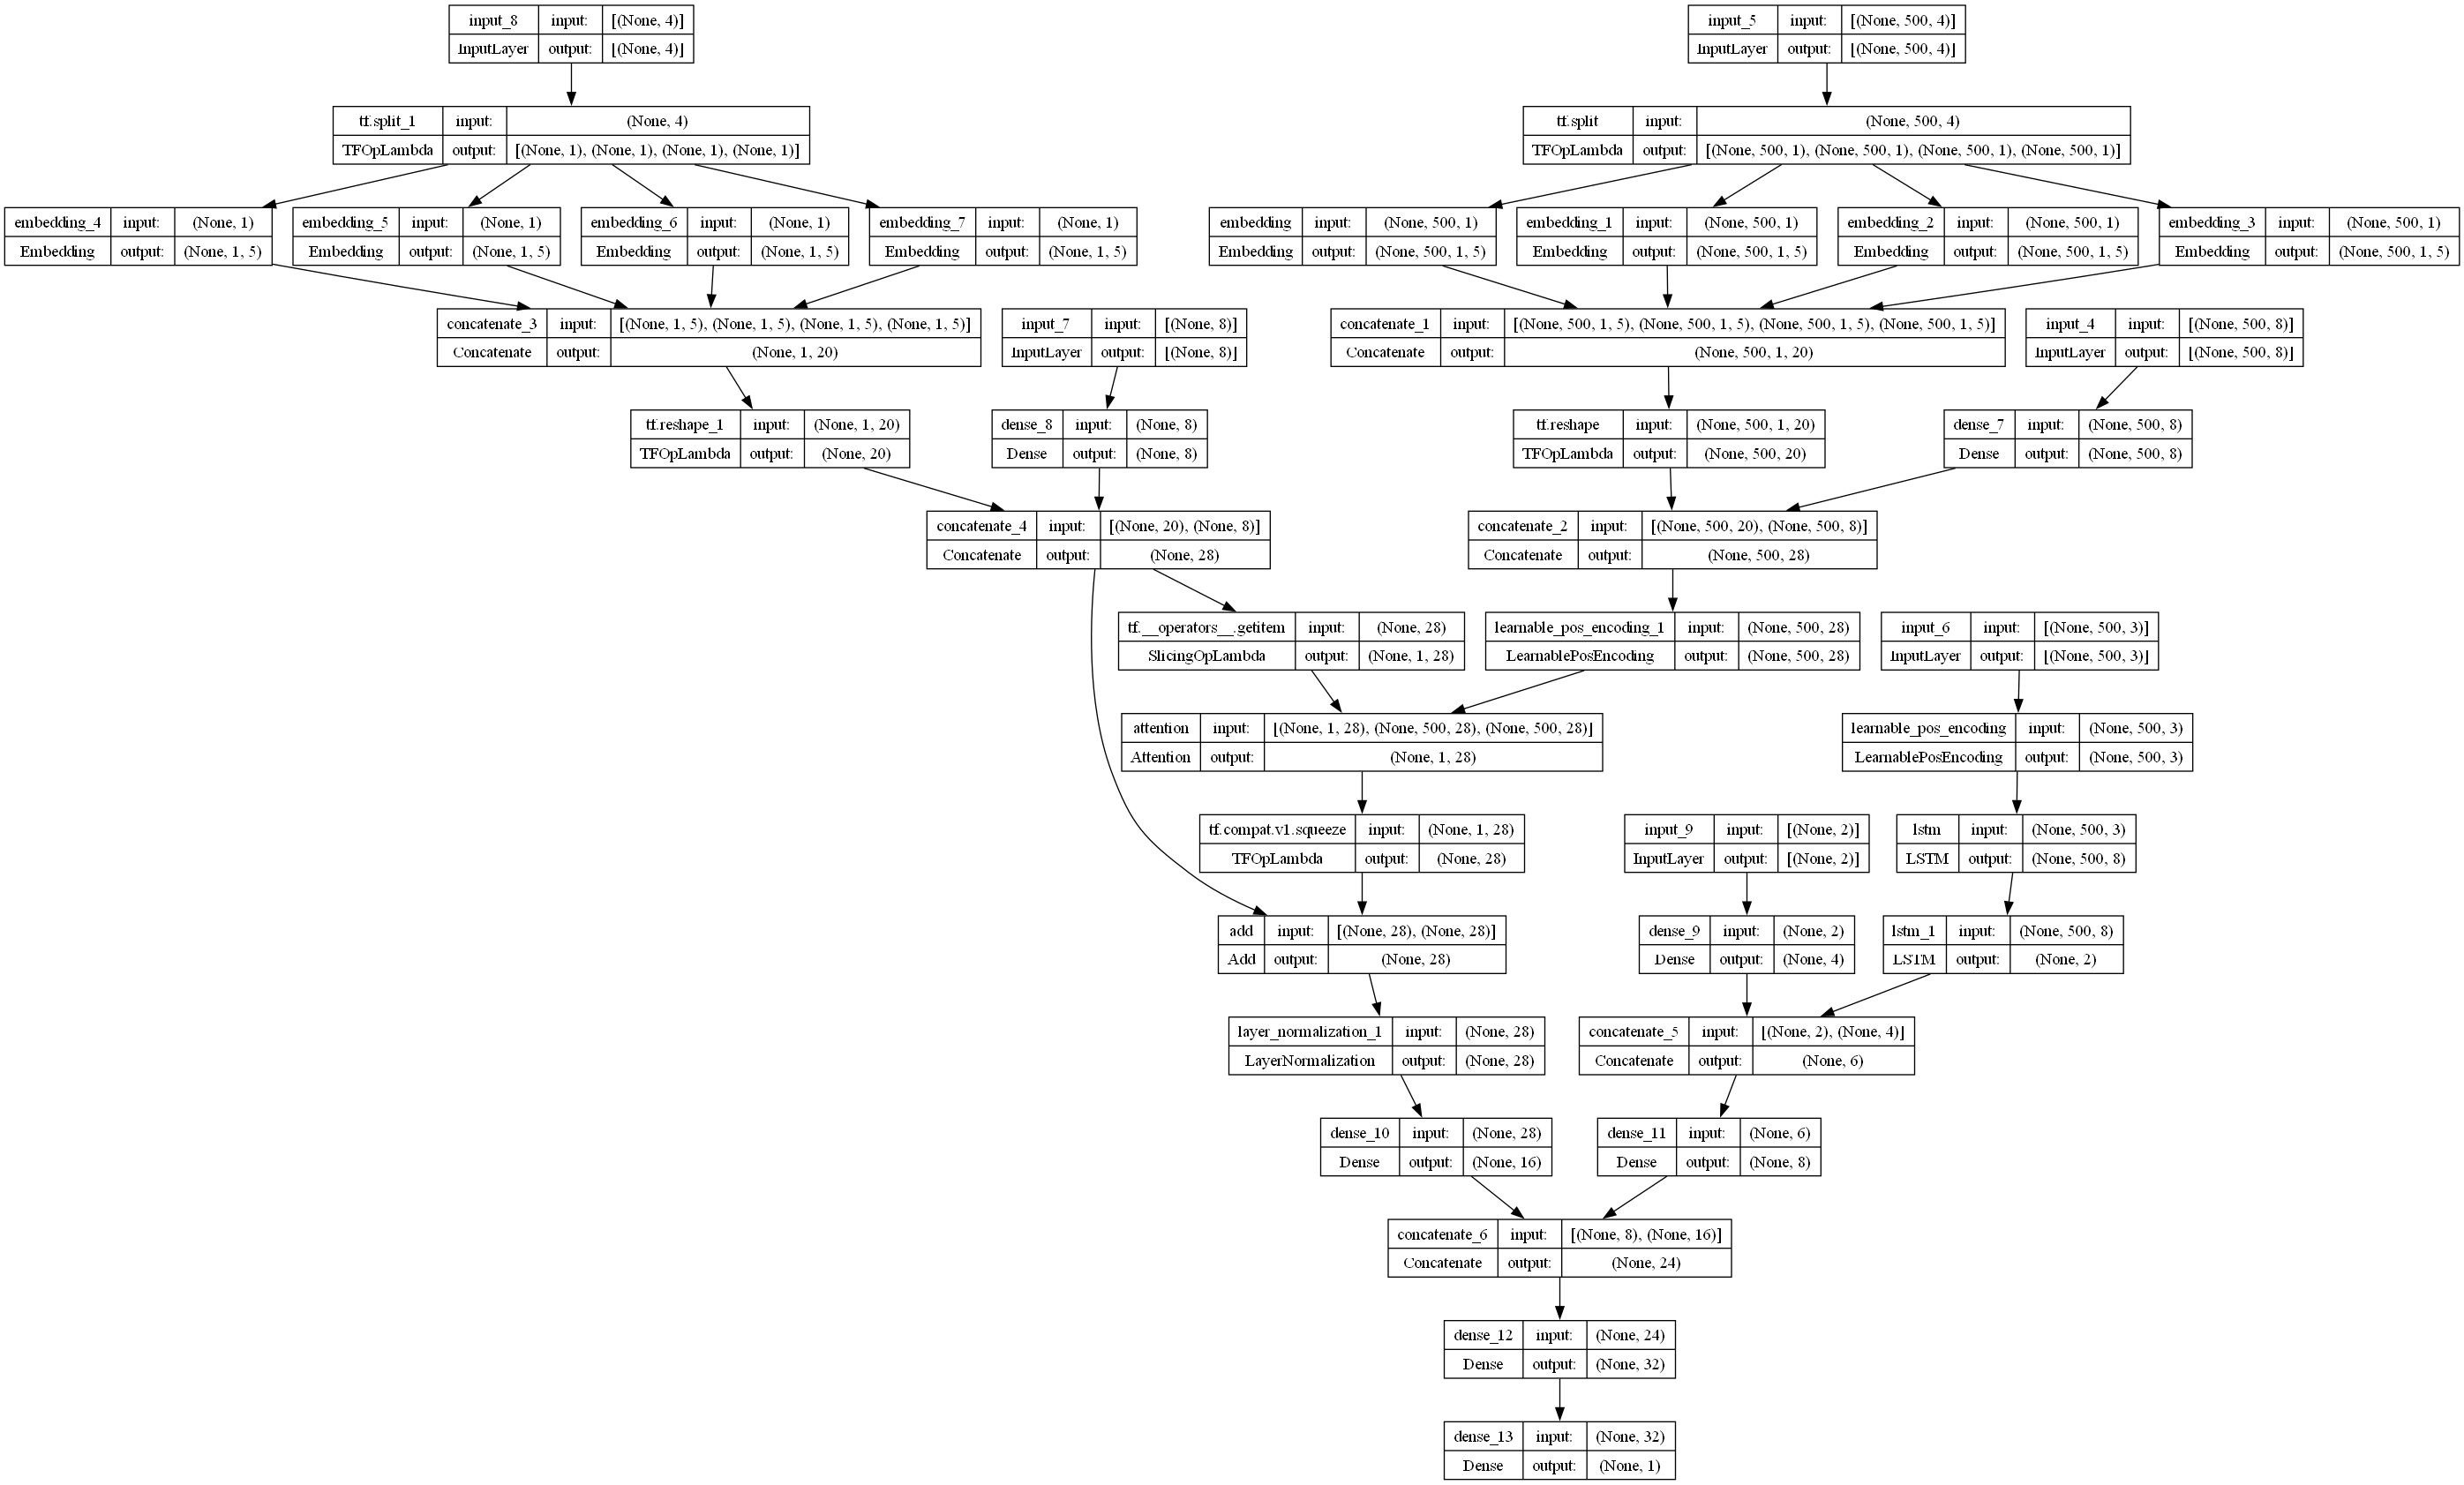

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 500, 4)]     0           []                               
                                                                                                  
 tf.split_1 (TFOpLambda)        [(None, 1),          0           ['input_8[0][0]']                
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1)]                                                 

None

Epoch 1/10
Split 1/10 RMSE loss: 0.09458
Split 2/10 RMSE loss: 0.07710
Split 3/10 RMSE loss: 0.05968
Split 4/10 RMSE loss: 0.05588
Split 5/10 RMSE loss: 0.05277
Split 6/10 RMSE loss: 0.05268
Split 7/10 RMSE loss: 0.05311
Split 8/10 RMSE loss: 0.05129
Split 9/10 RMSE loss: 0.05116
Split 10/10 RMSE loss: 0.05267
Epoch 1 RMSE loss: 0.06150
Epoch 2/10
Split 1/10 RMSE loss: 0.06448
Split 2/10 RMSE loss: 0.05414
Split 3/10 RMSE loss: 0.05716
Split 4/10 RMSE loss: 0.05524
Split 5/10 RMSE loss: 0.05232
Split 6/10 RMSE loss: 0.05246
Split 7/10 RMSE loss: 0.05260
Split 8/10 RMSE loss: 0.05096
Split 9/10 RMSE loss: 0.05113
Split 10/10 RMSE loss: 0.05235
Epoch 2 RMSE loss: 0.05439
Epoch 3/10
Split 1/10 RMSE loss: 0.06070
Split 2/10 RMSE loss: 0.05387
Split 3/10 RMSE loss: 0.05662
Split 4/10 RMSE loss: 0.05468
Split 5/10 RMSE loss: 0.05182
Split 6/10 RMSE loss: 0.05191
Split 7/10 RMSE loss: 0.05218
Split 8/10 RMSE loss: 0.05062
Split 9/10 RMSE loss: 0.05073
Split 10/10 RMSE loss: 0.05189
Epoch 3 RM

In [30]:
import tensorflow as tf

def create_sequences(dataframe, sequence_length, expand_dim = True):
    numpy_arr = dataframe.to_numpy()
    sequences = []
    queries = []
    for i in range(len(numpy_arr) - sequence_length):
        sequences.append(numpy_arr[i:sequence_length + i])
        if expand_dim:
            queries.append([numpy_arr[sequence_length + i]])
        else:
            queries.append(numpy_arr[sequence_length + i])
    return np.array(sequences), np.array(queries)

class LearnablePosEncoding(tf.keras.layers.Layer):
    def __init__(self, sequence_lenght, dims):
        super().__init__()
        self.pos_weights = self.add_weight("pos_weights", shape=(sequence_lenght, dims), trainable=True)
    def call(self, sequence):
        return sequence + self.pos_weights
    
def build_model(sequence_lenght):
    binary_input_sequence = tf.keras.layers.Input(shape=(sequence_lenght, binary_input_dim))
    non_binary_input_sequence = tf.keras.layers.Input(shape=(sequence_lenght, non_binary_input_dim))
    continous_input_sequence = tf.keras.layers.Input(shape=(sequence_lenght, continous_input_dim + 1))
    non_binary_splitted = tf.split(non_binary_input_sequence, non_binary_input_dim, axis=-1)

    positional_encoding_continous = LearnablePosEncoding(sequence_lenght, continous_input_dim + 1)(continous_input_sequence)
    binary_input_sequence_dense = tf.keras.layers.Dense(binary_input_dim, activation="relu")(binary_input_sequence)

    embedding_layers = []
    i = 0
    for tensor in non_binary_splitted:
        embedding = tf.keras.layers.Embedding(input_dim=vocab_sizes[i],output_dim=5)(tensor)
        i+=1
        embedding_layers.append(embedding)

    concat_embeddings = tf.keras.layers.Concatenate(axis=-1)(embedding_layers)
    concat_embeddings_w_binary = tf.keras.layers.Concatenate(axis=-1)([tf.reshape(concat_embeddings, (-1, sequence_lenght, 5*i)), binary_input_sequence_dense])
    positional_encoding_sequence = LearnablePosEncoding(sequence_lenght, binary_input_dim + i * 5)(concat_embeddings_w_binary)

    binary_input_query = tf.keras.layers.Input(shape=(binary_input_dim,))
    non_binary_input_query =  tf.keras.layers.Input(shape=(non_binary_input_dim))
    continous_input_query = tf.keras.layers.Input(shape=(continous_input_dim,))
    non_binary_splitted_query = tf.split(non_binary_input_query, non_binary_input_dim, axis=-1)
    binary_input_query_dense = tf.keras.layers.Dense(binary_input_dim, activation="relu")(binary_input_query)
    continous_input_query_dense = tf.keras.layers.Dense(4, activation="relu")(continous_input_query)

    embedding_layers_query = []
    i = 0
    for tensor in non_binary_splitted_query:
        embedding = tf.keras.layers.Embedding(input_dim=vocab_sizes[i],output_dim=5)(tensor)
        i+=1
        embedding_layers_query.append(embedding)

    concat_embeddings_query = tf.keras.layers.Concatenate(axis=-1)(embedding_layers_query)
    concat_embeddings_w_binary_query = tf.keras.layers.Concatenate(axis=-1)([tf.reshape(concat_embeddings_query, (-1, 5*i)), binary_input_query_dense])

    attention_output = tf.keras.layers.Attention(use_scale=True)([concat_embeddings_w_binary_query[..., tf.newaxis, :], positional_encoding_sequence, positional_encoding_sequence])
    attention_reduced = tf.squeeze(attention_output,axis=1)#tf.keras.layers.GlobalAveragePooling1D()(attention_output_normalized)
    add_attention_to_query = tf.keras.layers.Add()([attention_reduced, concat_embeddings_w_binary_query])
    attention_output_normalized = tf.keras.layers.LayerNormalization()(add_attention_to_query)
    attention_dense = tf.keras.layers.Dense(16, activation="sigmoid")(attention_output_normalized)

    lstm = tf.keras.layers.LSTM(8, return_sequences=True)(positional_encoding_continous)
    lstm_2 = tf.keras.layers.LSTM(2)(lstm)
    concat_continous_query_lstm = tf.keras.layers.Concatenate()([lstm_2, continous_input_query_dense])
    lstm_dense = tf.keras.layers.Dense(8, activation="sigmoid")(concat_continous_query_lstm)
    concatenate_all = tf.keras.layers.Concatenate(axis=-1)([lstm_dense,attention_dense]) #continous_input_query_dense, attention_dense])
    output_dense = tf.keras.layers.Dense(32, activation="sigmoid")(concatenate_all)
    output_final = tf.keras.layers.Dense(1, activation="sigmoid")(output_dense)
    return tf.keras.Model(inputs = [binary_input_sequence, non_binary_input_sequence, continous_input_sequence, binary_input_query, non_binary_input_query, continous_input_query], outputs = output_final)


EPOCHS = 10
SEQ_LENGTH = 500
if wiped_dataset == True:
    SEQ_LENGTH = 250
NUM_SPLITS = 10
BATCH_SIZE = 64
dlmodel = build_model(SEQ_LENGTH)
display(tf.keras.utils.plot_model(model=dlmodel, show_shapes=True))
display(dlmodel.summary())
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

@tf.function
def train_step(xb, xnb, xc, qb, qnb, qc, y):
    with tf.GradientTape() as tape:
        preds = dlmodel([xb, xnb, xc, qb, qnb, qc], training=True)
        loss = tf.keras.losses.mean_squared_error(y, preds)#mean_absolute_error(y, preds)
        loss = tf.reduce_mean(loss)

    grads = tape.gradient(loss, dlmodel.trainable_variables)
    optimizer.apply_gradients(zip(grads, dlmodel.trainable_variables))
    return loss

def forward_backward_pass():
    for epoch in range(EPOCHS):
        print(f"Epoch {epoch+1}/{EPOCHS}")
        epoch_loss = tf.keras.metrics.Mean()
        size_of_split = len(X) // NUM_SPLITS
        leftover = len(X) - NUM_SPLITS * size_of_split
        shift_back = 0
        for i in range(NUM_SPLITS):
            split_loss = tf.keras.metrics.Mean()
            if i == 1:
                shift_back = 1
            X_binary_sequences, X_binary_queries = create_sequences(X_binary[size_of_split * i - SEQ_LENGTH  * shift_back:(size_of_split * (i + 1)) + (leftover if i == NUM_SPLITS - 1 else 0)], SEQ_LENGTH, expand_dim=False)
            X_nonbinary_sequences, X_nonbinary_queries = create_sequences(X_nonbinary[size_of_split * i - SEQ_LENGTH  * shift_back:(size_of_split * (i + 1)) + (leftover if i == NUM_SPLITS - 1 else 0)], SEQ_LENGTH, expand_dim=False)
            X_continous_sequences, X_continous_queries = create_sequences(X_continous[size_of_split * i - SEQ_LENGTH  * shift_back:(size_of_split * (i + 1)) + (leftover if i == NUM_SPLITS - 1 else 0)],  SEQ_LENGTH, expand_dim=False)
            XY_continous, Y_queries = create_sequences(Y[size_of_split * i - SEQ_LENGTH  * shift_back:(size_of_split * (i + 1)) + (leftover if i == NUM_SPLITS - 1 else 0)], SEQ_LENGTH, expand_dim=False)
            X_continous_sequences = np.concatenate([X_continous_sequences, XY_continous], axis=-1)
            dataset = tf.data.Dataset.from_tensor_slices(((X_binary_sequences, X_nonbinary_sequences,  X_continous_sequences, X_binary_queries, X_nonbinary_queries, X_continous_queries), Y_queries)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
            for (xb, xnb, xc, qb, qnb, qc), y in dataset:
                loss = train_step(xb, xnb, xc, qb, qnb, qc, y)
                split_loss.update_state(loss)
                epoch_loss.update_state(loss)
            split_mean_loss = split_loss.result().numpy()
            print(f"Split {i + 1}/{NUM_SPLITS} RMSE loss: {np.sqrt(split_mean_loss):.5f}")
        epoch_mean_loss = epoch_loss.result().numpy()
        print(f"Epoch {epoch + 1} RMSE loss: {np.sqrt(epoch_mean_loss):.5f}")

forward_backward_pass()


### Encoding and scaling our deployment dataframe (50% starting from the bottom (ordered by installation date)) and dumping everything

In [31]:
D_XB = X_binary.columns.to_list()
D_XNB = X_nonbinary.columns.to_list()
D_XC = X_continous.columns.to_list()

joblib.dump({"Binary":D_XB, "Categorial": D_XNB, "Continous": D_XC}, "column_data50.pkl")

unique_catergories = {}
for col in D_XNB:
    unique_catergories[col] = df_deploy[col].unique().tolist()
joblib.dump(unique_catergories, "unique_categories50.pkl")

binary_encoders = {}
binary_encoders["customer"] = LabelEncoder().fit(["Consumer", "Business"])
df_deploy["customer"] = binary_encoders["customer"].transform(df_deploy["customer"])
for col in X_binary.columns[X_binary.columns != "customer"]:
    binary_encoders[col] = LabelEncoder().fit(["Yes", "No"])
joblib.dump(binary_encoders, "binary_encoders50.pkl")

categorical_encoders = {}
for col in D_XNB:
    categorical_encoders[col] = LabelEncoder().fit(df_deploy[col])
    df_deploy[col] =  categorical_encoders[col].transform(df_deploy[col])
joblib.dump(categorical_encoders, "categorical_encoders50.pkl")

categorical_scalers = {}
scale(MinMaxScaler, D_XNB, df_deploy, categorical_scalers)
joblib.dump(categorical_scalers, "categorical_scalers50.pkl")

continous_scalers = {}
scale(MinMaxScaler, [col for col in D_XC if col != "days_from_first"], df_deploy, continous_scalers)
joblib.dump(continous_scalers, "continous_scalers50.pkl")

y_scalers = {}
scale(MinMaxScaler, ["price_per_module"], df_deploy, y_scalers)
joblib.dump(y_scalers, "y_scalers50.pkl")

display(df_deploy[D_XB + D_XNB + D_XC].head(5))
display(df_deploy["price_per_module"].head(5))

,third_party_owned,built_in_meter_inverter_1,DC_optimizer,micro_inverter_1,self_installed,ground_mounted,tracking,customer,utility_service_territory,inverter_manufacturer_1,technology_module_1,module_manufacturer_1,days_from_first,power_per_module
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.000000,0.6,0.326733,0.000000,0.025675
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.5,0.725806,0.6,0.584158,0.000000,0.021089
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0,0.193548,0.6,0.391089,0.000499,0.020073
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.725806,0.2,0.871287,0.000499,0.024217
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.725806,0.2,0.509901,0.000499,0.021089


0    0.069079
1    0.080553
2    0.045893
3    0.119211
4    0.038968
Name: price_per_module, dtype: float64

### Training our best model (XGBOOST) using GridSearchCV with 3 folds on the whole deployment data

Let's also pick some small part of deployment data for validation "double check"  
{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}

Fitting 1 folds for each of 108 candidates, totalling 108 fits
{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}
RMSE: 0.05039018179074085
Explained variance: 0.6840422249753422
MAE: 0.02628059550284183
MAPE: 0.7082899569399418
R-squared: 0.6803887172080201


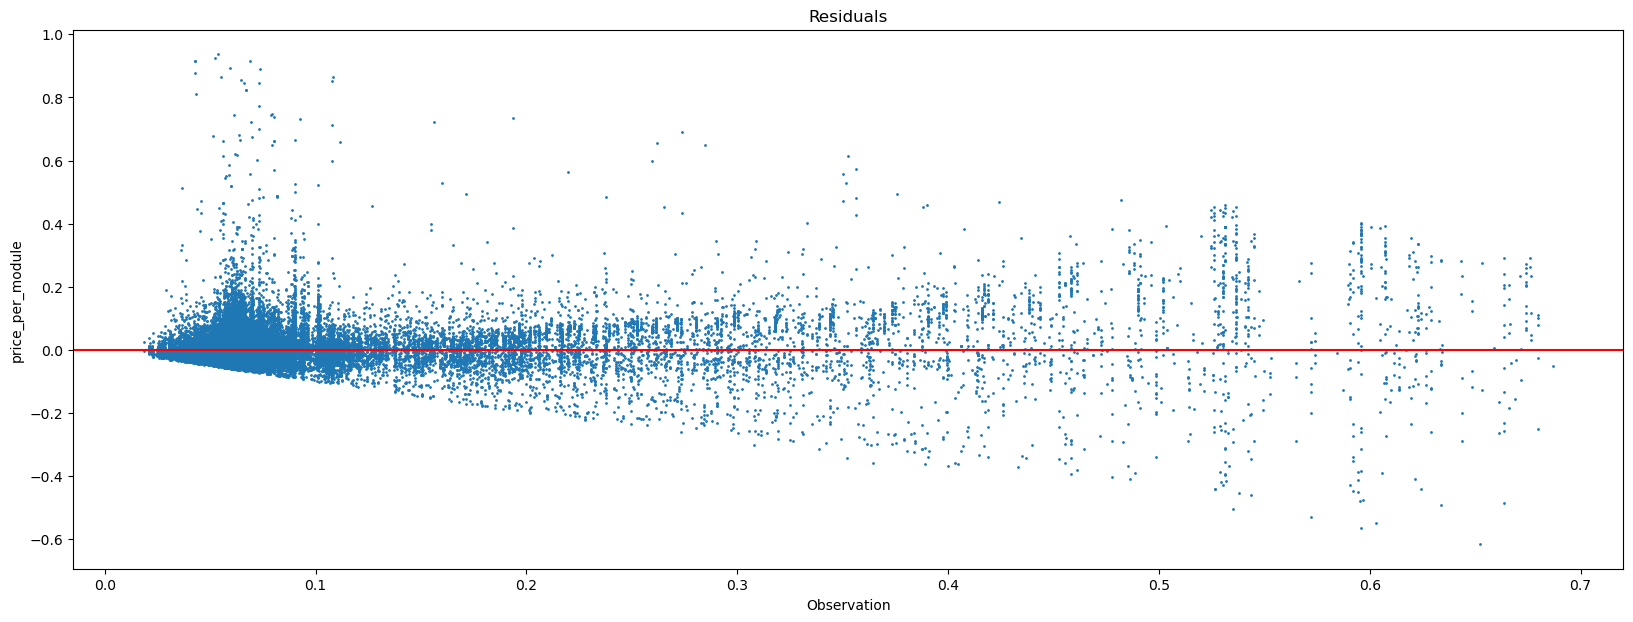

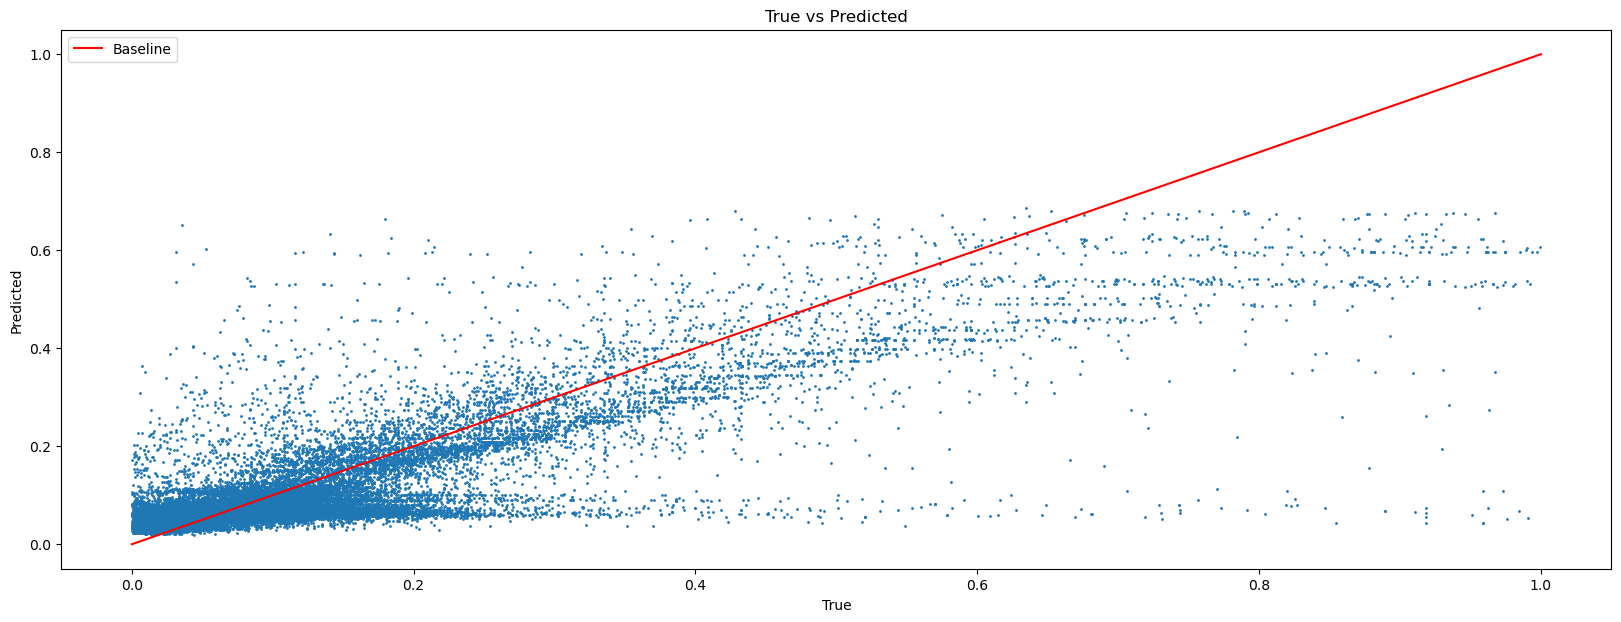

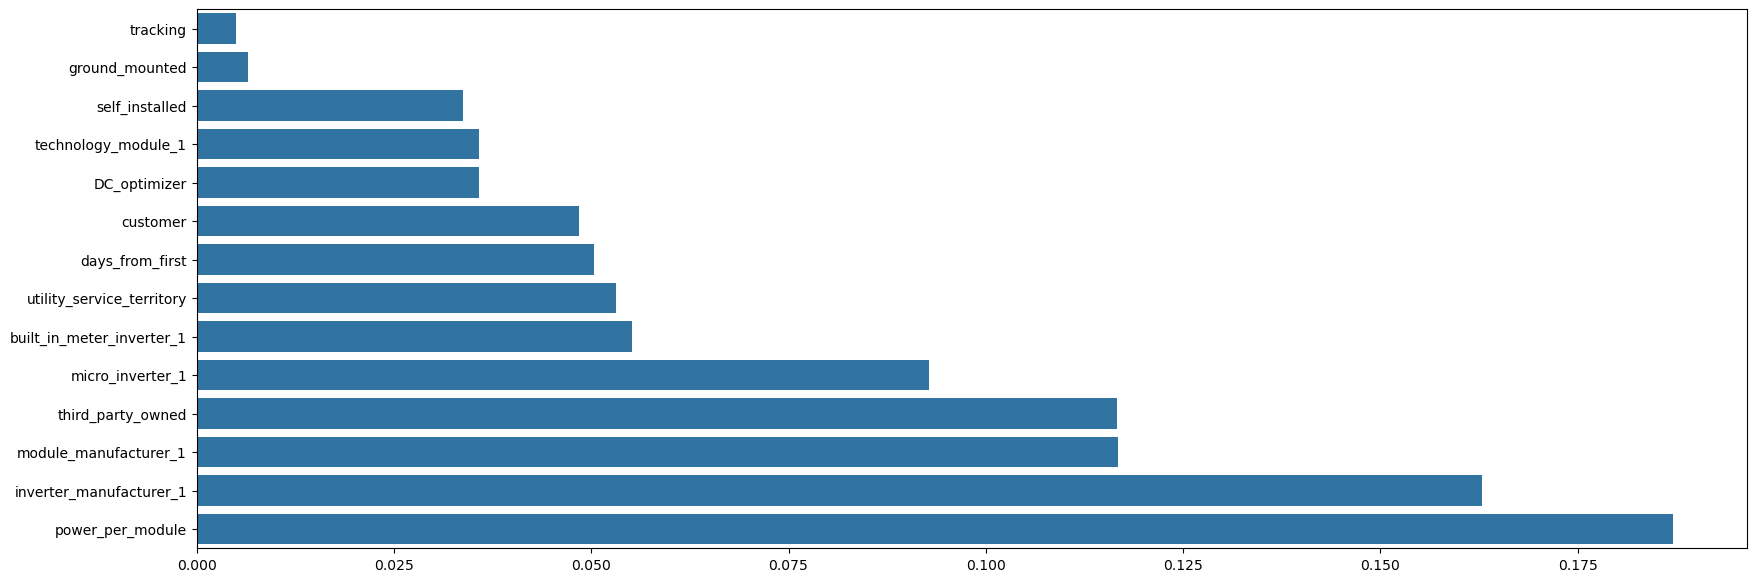

In [32]:
from sklearn.model_selection import GridSearchCV
#mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)


X_deploy = df_deploy[D_XB + D_XNB + D_XC].to_numpy()
Y_deploy = df_deploy["price_per_module"].to_numpy()

X_deploy_CV, X_deploy_test, Y_deploy_CV, Y_deploy_test = train_test_split(X_deploy, Y_deploy, test_size=0.2, shuffle=False)
X_deploy_CV, Y_deploy_CV = shuffle(X_deploy_CV, Y_deploy_CV, random_state=3515)

test_fold = np.zeros(len(X_deploy))
test_fold[len(X_deploy_CV):] = -1
splitter = PredefinedSplit(test_fold=test_fold)
X_deploy_CV = np.concatenate([X_deploy_CV, X_deploy_test], axis=0)
Y_deploy_CV = np.concatenate([Y_deploy_CV, Y_deploy_test],axis=0)

from xgboost import XGBRegressor
param_grid = {
        "learning_rate": [0.05, 0.1, 0.15],
        "max_depth": [6, 8, 15],
        "gamma":[0, 0.1, 0.2],
        "n_estimators": [50, 100, 150, 200] #50], 
    }
gs = GridSearchCV(estimator=XGBRegressor(device = "gpu", objective='reg:absoluteerror', random_state=42, verbosity = 0), scoring="explained_variance", cv = splitter, verbose=1, refit= True, param_grid=param_grid)
gs.fit(X_deploy_CV, Y_deploy_CV)
print(gs.best_params_)
best_model = gs.best_estimator_
preds = best_model.predict(X_deploy_test)
rmse = root_mean_squared_error(Y_deploy_test, preds)
explained_variance = explained_variance_score(Y_deploy_test, preds)
mae = mean_absolute_error(Y_deploy_test, preds)
mape = mean_absolute_percentage_error(Y_deploy_test, preds)
r2 = r2_score(Y_deploy_test, preds)
print("RMSE:", rmse)
print("Explained variance:", explained_variance)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)
plt.figure(figsize=(20, 7))
plt.scatter(preds ,Y_deploy_test - preds, s=1)
plt.axhline(y = 0, c = "red")
plt.ylabel("price_per_module")
plt.title("Residuals")
plt.xlabel("Observation")
plt.show()
plt.figure(figsize=(20, 7))
plt.scatter(Y_deploy_test, preds, s=1)
plt.plot([0,1], [0,1], c = "red", label = "Baseline")
plt.ylabel("Predicted")
plt.xlabel("True")
plt.title("True vs Predicted")
plt.legend()
plt.show()
plt.figure(figsize = (20,7))
sorted_ind = np.argsort(best_model.feature_importances_)
sns.barplot(y = np.array(X.columns)[sorted_ind], x=best_model.feature_importances_[sorted_ind], orient="h")
plt.show()


It was also decided to verify DL model on bigger chunk of data

Epoch 1/15
12127/12127 [==============================] - 104s 9ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 2/15
12127/12127 [==============================] - 104s 9ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 3/15
12127/12127 [==============================] - 105s 9ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 4/15
12127/12127 [==============================] - 100s 8ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 5/15
12127/12127 [==============================] - 100s 8ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 6/15
12127/12127 [==============================] - 98s 8ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 7/15
12127/12127 [==============================] - 99s 8ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 8/15
12127/12127 [==============================] - 100s 8ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 9/15
12127/12127 [==============================] - 100s 8ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 10/15
12127/12127 [=======================

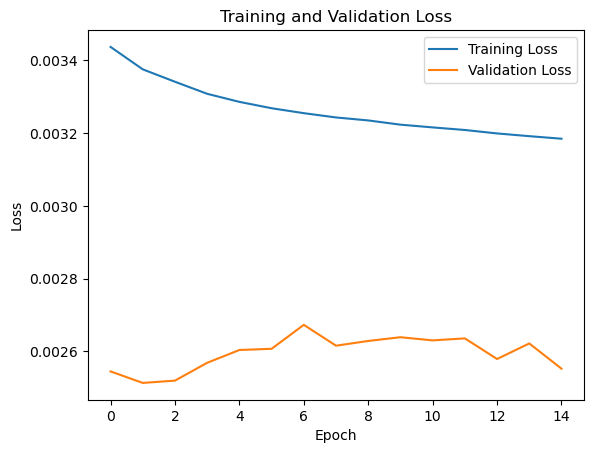

1348/1348 [==============================] - 4s 3ms/step
RMSE: 0.05052423771537941
Explained variance: 0.6451617934306171
MAE: 0.02952021885830764
MAPE: 0.9177490261005986
R-squared: 0.6435394322625884


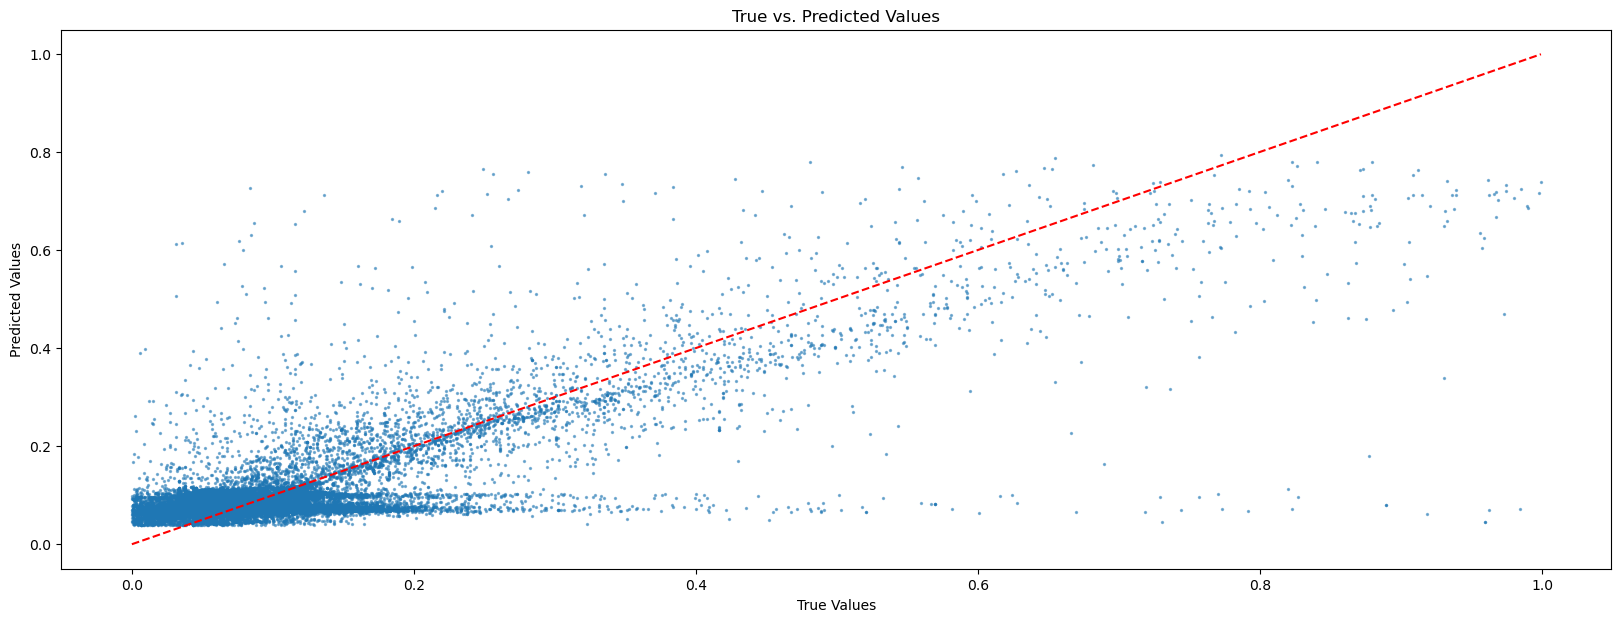

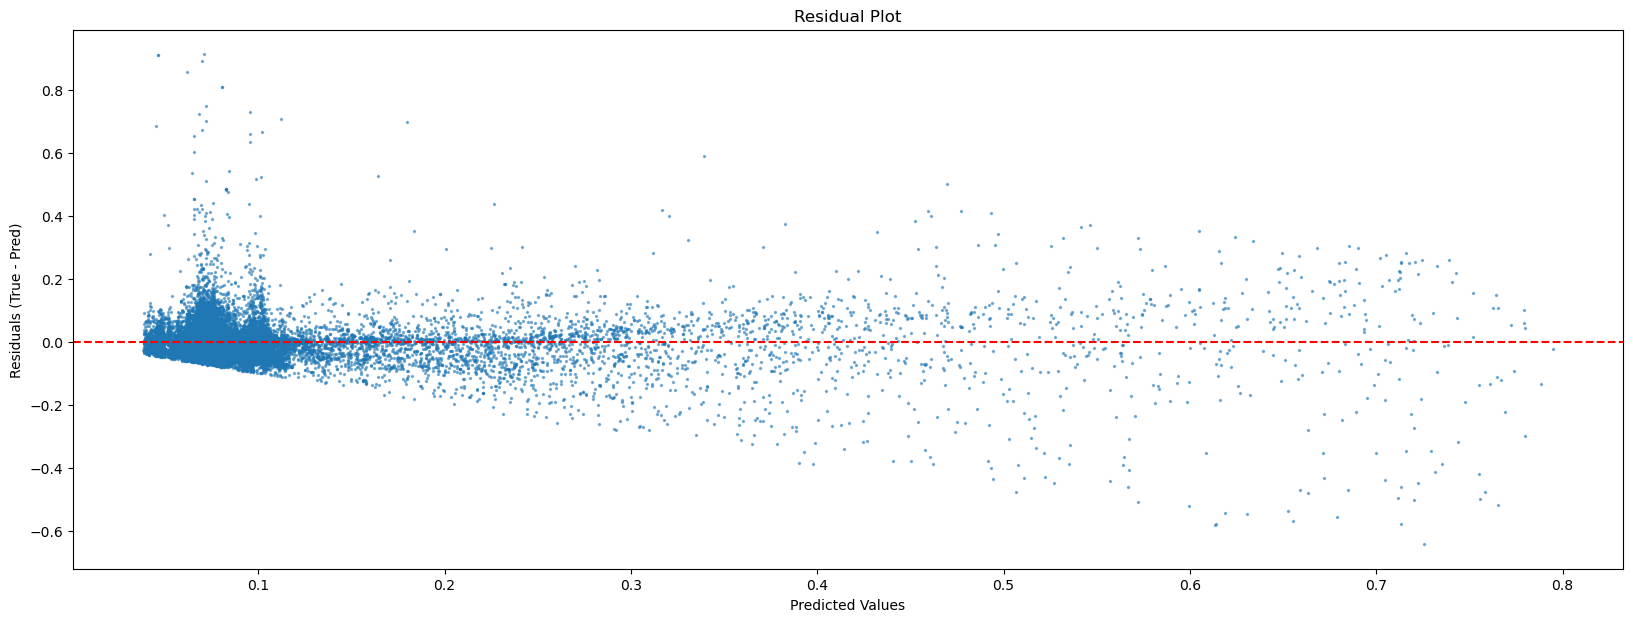

In [33]:
# some copy pasting...
BATCH_SIZE = 32
X_deploy = df_deploy[D_XB + D_XNB + D_XC]
Y_deploy = df_deploy["price_per_module"]
X_deploy_CV, X_deploy_test, Y_deploy_CV, Y_deploy_test = train_test_split(X_deploy, Y_deploy, test_size=0.1, shuffle=False)
X_deploy_CV, Y_deploy_CV = shuffle(X_deploy_CV, Y_deploy_CV, random_state=3515)

dense_D_XB, dense_D_XNB, dense_D_XC = X_deploy_CV[D_XB].to_numpy(), X_deploy_CV[D_XNB].to_numpy(), X_deploy_CV[D_XC].to_numpy()
dense_D_Y, dense_D_Y_test = Y_deploy_CV.to_numpy(), Y_deploy_test.to_numpy()
dense_D_XB_test, dense_D_XNB_test, dense_D_XC_test = X_deploy_test[D_XB].to_numpy(), X_deploy_test[D_XNB].to_numpy(), X_deploy_test[D_XC].to_numpy()

train_dataset = tf.data.Dataset.from_tensor_slices(((dense_D_XB,  dense_D_XNB,  dense_D_XC), dense_D_Y)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset = tf.data.Dataset.from_tensor_slices(((dense_D_XB_test, dense_D_XNB_test,  dense_D_XC_test), dense_D_Y_test)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

history = dense_model.fit(train_dataset, validation_data=validation_dataset, epochs=15)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

test_inputs = (dense_D_XB_test, dense_D_XNB_test, dense_D_XC_test)
y_pred = dense_model.predict(test_inputs).flatten()
y_true = dense_D_Y_test.ravel()

rmse = root_mean_squared_error(y_true, y_pred)
explained_variance = explained_variance_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("RMSE:", rmse)
print("Explained variance:", explained_variance)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)

plt.figure(figsize=(20, 7))
plt.scatter(y_true, y_pred, alpha=0.5,  s = 2)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(20, 7))
plt.scatter(y_pred, residuals, alpha=0.5, s = 2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (True - Pred)")
plt.title("Residual Plot")
plt.show()

## Modelling and evaluation report
### Feature selection and preprocessing
* F-regression, F-scoring and chi2 scoring (phase 3-4)
* F-scoring with swapped X-Y (price explains category)
* 2 Uniques per column -> encoded 0/1
* More than two -> label encoding + scaling (one hot was not tested, only frequency encoding tested separately)
* Continuous variables -> outliers dropped (only for target Y which is price) + minmax (standard scaling produces huge z-scores, variance problems and non-Gaussian destributions)
* Dates -> depending on minimum date in chunk, custom minmax based on shifted min-max date range (2 years ahead), represents well temporal change, no seasonality was noticed in phase 2-3
* Dropped rows where rebate or grant > 10000 to create less noise, according to documentation final price is a value before any incentives, but statistically price per module (total installed price/module quantity) has -0.02 correlation with grants, which shows tiny impact of rebates or grants on solar panel price, which shouldn’t be true

Variables used for price prediction: 
1.  utility_service_territory	
2.  third_party_owned	
3.  built_in_meter_inverter_1	
4.  inverter_manufacturer_1	
5.  DC_optimizer	
6.  micro_inverter_1	
7.  technology_module_1	
8.  self_installed	
9.  ground_mounted	
10. tracking	
11. customer	
12. days_from_first	
13. module_manufacturer_1
14. power_per_module

Modelling was also tested including and excluding module manufacturer and on the second dataset (the one which was wiped out from all NA rows in the core variables).   
Best results were achieved on the dataset which had NA values filled in the Phase 3, and separately included module manufacturer column. Notebook was executed many time, when testing more global things. One thing i have not tested is one-hot encoding. Frequency encoding was tested (worse than scaled label encoding)

### 1. Auto-regression (only consumer customer results)
Data starting from 2015 was used from varibales price_per_module, power_per_module. Aggeregated by mean per day.
For all model's parameter calibration was used GridSearch with one fold 75% of past train and future 25% validation (time-series).
**ARIMA**
```
RMSE: 0.004487959545549141
Explained variance: 0.6608567973472683
MAE: 0.0032392049849394684
MAPE: 0.09933386248377869
R-squared: 0.5352110882921808
```
**ElasticNet Auto-Reg**
```
RMSE: 0.0038263055991968054
Explained variance: 0.6641166190193835
MAE: 0.0024535081506044075
MAPE: 0.08036623133161713
R-squared: 0.6621552315677024
```
**DecistionTree Auto-Reg**
```
RMSE: 0.004314676379388578
Explained variance: 0.6084027854572499
MAE: 0.002953923412127762
MAPE: 0.09172777820611906
R-squared: 0.5704098192727858
```
Quite decent results for all models, ElasticNet is winner with following paramters: 30 lags, alpha 0.001, l1_ratio 1.0.

### 2. So far results for the price prediction are following on the 20% of dataset:
Starting installation date:  2018-09-24  
Initially with all models was used GridSearch with 3 folds of cross-validation. Later it was decided to use different approach "so called" 1-Fold CV (just a train-validation split), data was splitted into two parts, a part for training 80% and testing data 20% of future (custom splitter for GridSearchCV). Sample for training was shuffled (not sure that it was needed) and concatenated back with non-shuffled validation sample. It was done to avoid data leakeage of future during the parameter tuning. Scoring for GridSearch was set to explained variance and loss functions MAE/MSE depending on the model, it was also tested many times, as loss functions also significantly impact performance of models with this dataset. 
### Regressive models with all features
**ElasticNet**
```
RMSE: 0.05485857366499232
Explained variance: 0.5629198798899089
MAE: 0.03171057628172748
MAPE: 0.9941313476873186
R-squared: 0.562876679180645
```
**Decision Tree Regression**
```
RMSE: 0.051187119204757214
Explained variance: 0.619721860268274
MAE: 0.030142653748891253
MAPE: 0.9680779003303693
R-squared: 0.6194284401991732
```
**XGBOOST**
```
RMSE: 0.04625296611177311
Explained variance: 0.6917335128655442
MAE: 0.021966998371474044
MAPE: 0.5970654784976314
R-squared: 0.6892621686048128
```
**Stacking Regressor (XGBOOST + Decision tree + Linear Regression)**
```
RMSE: 0.04598743577670056
Explained variance: 0.6929279459226774
MAE: 0.023203423839256037
MAPE: 0.702888483894173
R-squared: 0.692819712633507
```
All models have achieved quite decent metrics for RMSE, Explained variance and R-squared, but we have a big problems with MAE and MAPE. MAPE around 0.9 for elastic net and decision tree means that prediction twice more of true value on average, which is not very good. In this terms XGBOOST is the winner having MAPE 0.59, as well as top other metrics among models (a tiny downgrade in terms of other metrics in comparison with stacking regressor, but MAPE/MAE is crucial here). I have also tried setting objective to squared error but it didn't imporve the results (probably due to effect of min max scaling), current objective function which is used - absolute error. XGBOOST parameters: 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150. Please notice also that order of X variables in which they appear in the dataset affect the performance of XGB and DL models with this data. Also XGBOOST produces different feature importances if loss function is set to MSE. MSE gives much less penalty for moderate and small deviations in comparison with MAE. With MSE XGBOOST gives 65% of importance to power_per_model and produces worse MAPE results. With loss set to MAE importance is destributed more balanced.
### Deep learning models
**Dense**
```
RMSE: 0.0509372745168615
Explained variance: 0.6049308232510379
MAE: 0.029170660277455795
MAPE: 1.20912959841148
R-squared: 0.6043820383419976
```
**Attention + LSTM**
```
Epoch 10 RMSE loss: 0.05197
```
Deep learning models have very big problems with convergence with this data, Attention + LSTM model which is built for sequences is very heavy in terms of memory usage, so custom loop was defined. Still very big MAPE loss. RMSE on the level of Decision tree, maybe more dense layers and neurons needed + more epochs 30-50. MAE is tried as loss - no improvements.

### Results for the price prediction on the 50% of data (which was planned to use as deployement data after prototyping on the 20%)
Starting installation date:  2016-07-06
From the 20% of data the winner is XGBOOST.  
So 50% of data was modelled using XGBOOST and also tested dense DL model from 20%.  
**XGBOOST**
```
RMSE: 0.05039018179074085
Explained variance: 0.6840422249753422
MAE: 0.02628059550284183
MAPE: 0.7082899569399418
R-squared: 0.6803887172080201
```
**Dense**
```
RMSE: 0.052656369159991404
Explained variance: 0.6252372009075586
MAE: 0.03253521538459146
MAPE: 0.980092785672946
R-squared: 0.6128192344454919
```

Dense model has noticably improved the results on a bigger chunk of data in terms of MAPE but have other metrics worse. The result of XGBOOST is worse 11% MAPE difference with comparison to version trained and tested on 20%. But still XGBOOST seem to be the best performer on this dataset. XGBOOST parameters: 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100

### Reflection
Initially it was planned to use 20% of data for selecting best performers and then re-evaluation and re-training of best performers on the 50% of data, but it is seen that results on the bigger chunk predicting future values are worse and it signifies that there is pattern change present throughout the timespan. Anyway 50-70% MAPE from my point of view is huge despite the data chunk size. XGBOOST is definitely the best performer among models which consider all mentioned features (in terms of training speed and parameter search, parameter tweaking for Stacking regressor will last ages), so I am not quite sure should we use for the deployment the version trained on recent 20% or on 50% (everything suggests that should be used only recent 20% starting 2018-09-24, or even smaller chunk). Decent results in terms of MAPE are noticed only on auto-regressive models MAPE: 0.08. Deep learning performed quite bad, very slow convergence, maybe I made not very properly designed models. The most frustrating thing is that XGB produces different results during cross validation on change of column order in X, the same thing i noticed with DL model.

In [34]:
#saving the models
models["XGB"].fit(X, Y)
models["XGB"].save_model("xgb20.json")
best_model.fit(X_deploy, Y_deploy)
best_model.save_model("xgb50.json")
dense_model.save('dense.h5')

# Phase-6 Deployment report
**[Presentation](Presentation-Leo.pdf)**

The selected model for current "alpha" deployment is the XGBoost model trained on the most recent 20% of data, starting from 2018. It was decided to do so because it best represents the current market trends and gives the most accurate results for future predictions. Although there is amodel which was trained on a larger 50% of data, it's performance is worse, indicating that older data introduces changes in patterns that affect accuracy (data drift), so for final deployment even smaller chunk of latest data might be considered. Also very decent performance is seen from the autoregressive models (especially auto-regressive elasticnet) which should be a part of deployment. Throughtout the phases 1-6 was developed quite robust preprocessing and modelling pipeline, which can be easily adjusted. Pipeline is mostly pedendent on target variables names rather than X variables whose preprecessing is completely automated based on datatypes and unique values, it is very easy to re-use the notebooks for any other dataset.

Link for working "alpha" draft of the service using Flask backend which was produced as a part of the project **[app](../Phase%206/app.py)**

Following variables are needed for the prediction:
1.  utility_service_territory	
2.  third_party_owned	
3.  built_in_meter_inverter_1	
4.  inverter_manufacturer_1	
5.  DC_optimizer	
6.  micro_inverter_1	
7.  technology_module_1	
8.  self_installed	
9.  ground_mounted	
10. tracking	
11. customer	
12. days_from_first	(date of interest)
13. module_manufacturer_1  
14. power_per_module

Models can be hosted on some cloud server. Usual virtual machine with sufficient resources to ensure quick responses to prediction requests. To make the model easily accessible, a lightweight web service is created. This service allows authorized users or systems to send data and receive price predictions in return. All components — the model, the supporting data transformations, and the service itself — will be packaged together to ensure stability and ease of updates in the future.

The initial upload of the model and service to the server will can be done manually. In future updates, automated tools may be introduced for this process. Main users will be internal staff — analysts, project managers, and possible client representatives (energy companies, installers) who need to forecast prices. Access will be controlled. Only authorized users will be able to send prediction requests, and sensitive functions like retraining or system updates will be restricted to administrators.

New incoming data — such as records of new installations — will be collected and stored. This data will not immediately impact the deployed model but will be used for regular checks and scheduled retraining.

Initially, the application will offer a simple API interface — a service that other applications or systems can interact with.

**Monitoring**  

When deployed, the system will be needed to monitor carefully. 
1.  Tracking the technical health of the service to ensure it remains alive. 
2.  Equally important will be the monitoring of the model’s performance. Over time, it is expected that market conditions or customer behavior may shift and cause data drift. To catch these changes early, it is needed regularly compare the model’s predictions with actual outcomes. If the model’s accuracy noticeably worsens, particularly if the prediction errors grow by more than 10% compared to the initial levels, it is possible to set up alert triggering, and consider model retraining. It is also important to monitor the incoming data to make sure it remains consistent with the kind of data the model was trained on. If large differences are found (for example, a new type of solar module appears on the market, or new features describing installation appear), this would also be a signal for an update.

**Maintenance**
1.  Scheduled retraining of the model every three to six months or sooner if performance monitoring suggests it is needed.
2.  All models and versions will be carefully archived and dumped so it is always possible to trace back to a specific model version. Backups of all key components — the model, supporting data, and prediction service — will be needed regularly to prevent data losses.
3.  Documentation covering the deployment, monitoring, and retraining processes must be kept up to date. This will ensure that the system can be easily maintained and adapted for new people involved in process.

**Review**  

The data quality in this dataset created significant challenge and definitely impacted performance of models. Issues like missing values, outliers, huge variance, and high cardinality in categorical variables have affected the stability of predictive models, despite careful feature selection and preprocessing. 

A surprising finding was the sensitivity of the XGBoost model to the order of features in the training dataset. XGBoost's MAPE fluctuated by up to +-7% depending on feature order in the dataset. This may show feature interaction issues or something else (this is the first time in my life i encounter such a problem).

Performance instability was also observed across dataset sizes. When trained on larger portions (50%), XGBoost's MAPE increased compared to smaller subsets (20%), possibly due to patterns the model struggles to capture, data drift, imbalanced installation features (for example consider dropping business customer completely it has a lot of noise).

Other models also showed inconsistent performance. Deep learning models have very slow convergence and had high MSE and MAPE during the test runs , might be due to inproper design, or hyperparameters being set (or might be also caused by the dataset quality since other models also have pretty bad results). Only Auto-Regressive models performed relatively well.

In conclusion, while some models are promising, data quality issues such as missing values, feature interactions, high cardinality, and XGBoost’s column feature order sensitivity needs to be studied separately. Improvements in preprocessing, such as better handling of missing values and stabilization of dataset is essential. Further evaluation and potential reviews to the training process, including alternative feature selection or different scaling methods, testing other models such as RFR/SVR and different stacking options should be considered before final deployment.
